<a href="https://colab.research.google.com/github/YuyangXie1998/DataGlacier/blob/main/W2_cab_investment_case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# G2M insight for Cab Investment Firm

## 1. Business Problem

XYZ is a private equity firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry.

So the Objective of this analysis is to provide actionable insights to help XYZ firm in identifying the right company for making investment.

The case study has been divided into four parts:
1. Data Preparation
2. Exploratory Data Analysis: What are the attributes of customer segments? Is there any seasonality in number of customers using the cab service? Which company has maximum cab users at a particular time period? Does margin proportionally increase with increase in number of customers?
3. Modeling and forecasting profit and number of transactions for each cab company
4. Finding the most profitable cab company and making recommendations for investment


## 2. Data Preparation

In [1]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2.1 Data Loading

In [2]:
url_cab = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
url_city = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
url_cust = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
url_tran = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'

In [3]:
import requests
#request file URLs
info1 = requests.head(url_cab)
info2 = requests.head(url_city)
info3 = requests.head(url_cust)
info4 = requests.head(url_tran)
#fetching the header information
print(info1.headers)
print(info2.headers)
print(info3.headers)
print(info4.headers)
#printing the details

{'Connection': 'keep-alive', 'Content-Length': '5240663', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"14e4000dab3162a866b3e02d33910d0c01caf906390c3e3646f2cde108c0ee88"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '52AE:2F10:8142E:E02B3:6297155B', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 01 Jun 2022 07:56:50 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-fty21343-FTY', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1654070210.310168,VS0,VE103', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': '8e6ac19c54e6eff9959ebc930e75d052ef3e5241', 'Expires': 'Wed, 01 Jun 2022 08:01:50 GMT', 'Source-Age': '0'}
{'Connection': 'keep-alive', 'Content-Leng

In [4]:
df_cab = pd.read_csv(url_cab)
df_city = pd.read_csv(url_city)
df_cust = pd.read_csv(url_cust)
df_tran = pd.read_csv(url_tran)

In [5]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df_cab.shape

(359392, 7)

In [7]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
df_city.shape

(20, 3)

In [9]:
df_cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df_cust.shape

(49171, 4)

In [11]:
df_tran.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
df_tran.shape

(440098, 3)

### 2.2 Data Processing

#### 2.2.1 Field/feature transformations

In [13]:
df_cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [14]:
# transform the data type of Date of Travel
from datetime import date, datetime, timedelta

for i in range(len(df_cab['Date of Travel'])):
  df_cab['Date of Travel'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_cab['Date of Travel'][i] - 2).date()

df_cab["Date of Travel"] = pd.to_datetime(df_cab["Date of Travel"], format = '%Y-%m-%d', errors = 'coerce')
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [16]:
# transform the text of numbers to numeric
for i in df_city['Population']:
  df_city['Population'] = df_city['Population'].replace(',', '', regex=True)
  df_city['Population'] = pd.to_numeric(df_city['Population'])

for i in df_city['Users']:
  df_city['Users'] = df_city['Users'].replace(',', '', regex=True)
  df_city['Users'] = pd.to_numeric(df_city['Users'])

df_city = df_city.sort_values(by=['Population', 'Users'], ascending=False)
df_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [17]:
df_cust.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [18]:
df_tran.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

#### 2.2.2 Create master data

In [19]:
df = pd.merge(df_cab, df_city, how='left', left_on='City', right_on='City')
df = pd.merge(df, df_tran, how='left', left_on='Transaction ID', right_on='Transaction ID')
df = pd.merge(df, df_cust, how='left', left_on='Customer ID', right_on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536


In [20]:
#df['Net Margin %'] = (df['Price Charged'] - df['Cost of Trip'])/df['Price Charged']*100
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844


In [21]:
df['Profit per KM'] = df['Profit']/df['KM Travelled']
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844,1.929439


In [22]:
df.shape

(359392, 16)

#### 2.2.3 Identify and remove duplicates

In [23]:
# calculate the frequency of users taking cabs of two companies
customerid_freq = df.groupby(['Company'])['Customer ID'].value_counts()
customerid_freq = pd.DataFrame(customerid_freq)
customerid_freq = customerid_freq.rename(columns={'Customer ID':'Frequency'})
customerid_freq = customerid_freq.reset_index()
customerid_freq.head()

,Company,Customer ID,Frequency
0,Pink Cab,8120,18
1,Pink Cab,6159,17
2,Pink Cab,7927,17
3,Pink Cab,8595,17
4,Pink Cab,7340,16


In [24]:
customerid_freq.shape

(72226, 3)

In [25]:
customerid_freq.groupby('Company')['Company'].count()

Company
Pink Cab      32330
Yellow Cab    39896
Name: Company, dtype: int64

In [26]:
df_dedupe = df.copy()
df_dedupe = df_dedupe.sort_values(by='Date of Travel', ascending=True)
df_dedupe = df_dedupe.drop_duplicates(subset=['Company', 'Customer ID'], keep='last')
df_dedupe.shape

(72226, 16)

In [27]:
# join by Company and Customer ID
df_dedupe2 = pd.merge(df_dedupe, customerid_freq, on=['Company', 'Customer ID'], how='left')
df_dedupe2.shape

(72226, 17)

In [28]:
df_dedupe2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM,Frequency
0,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.200,943999,6133,21481,Card,Male,28,18030,597.320,19.910667,1
1,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,545776,7044,47687,Card,Male,25,16088,518.220,13.637368,1
2,10000345,2016-01-02,Pink Cab,SEATTLE WA,20.40,259.48,234.600,671238,25063,37896,Card,Male,39,7143,24.880,1.219608,1
3,10000164,2016-01-02,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,943999,6133,22469,Card,Male,37,4378,24.375,2.850877,1
4,10000163,2016-01-02,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,943999,6133,22557,Cash,Male,38,8808,22.730,5.119369,1


## 3. EDA

### 3.1 Desciptive Analysis

#### 3.1.1 Common

In [29]:
# Missing Value
# pd.set_option('display.max_rows', None)
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Profit                0
Profit per KM         0
dtype: int64

In [30]:
df_dedupe2.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Profit                0
Profit per KM         0
Frequency             0
dtype: int64

#### 3.1.2 Categorical

In [31]:
# Cardinality
df[['Company', 'City', 'Payment_Mode', 'Gender']].nunique()

Company          2
City            19
Payment_Mode     2
Gender           2
dtype: int64

In [32]:
df_dedupe2[['Company', 'City', 'Payment_Mode', 'Gender']].nunique()

Company          2
City            19
Payment_Mode     2
Gender           2
dtype: int64

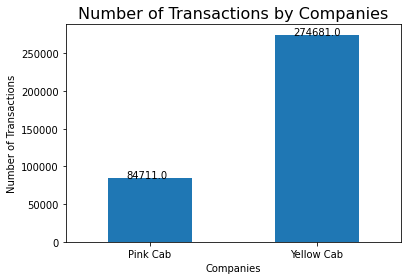

In [33]:
# Unique Counts

# 1.1 Number of Transactions by Companies
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df['Company'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.18,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Transactions")
plt.xlabel("Companies")
plt.xticks([0.25, 0.75], ['Pink Cab', 'Yellow Cab'])
plt.xlim(0,1)
plt.title("Number of Transactions by Companies", fontsize=16)

plt.show()

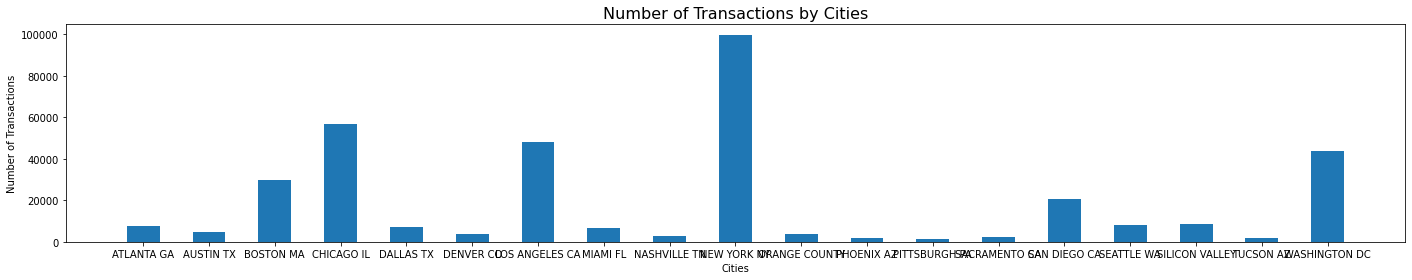

In [34]:
# 1.2 Number of Transactions by Cities
plt.figure(figsize=(24,4))
plt.hist(df['City'], np.arange(20)-0.5, rwidth=.5)
plt.ylabel("Number of Transactions")
plt.xlabel("Cities")
plt.title("Number of Transactions by Cities", fontsize=16)

plt.show()

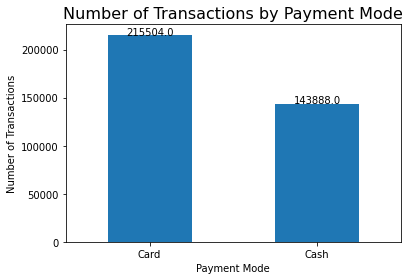

In [35]:
# 1.3 Number of Transactions by Payment Method
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df['Payment_Mode'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.18,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Transactions")
plt.xlabel("Payment Mode")
plt.xticks([0.25, 0.75], ['Card', 'Cash'])
plt.xlim(0,1)
plt.title("Number of Transactions by Payment Mode", fontsize=16)

plt.show()

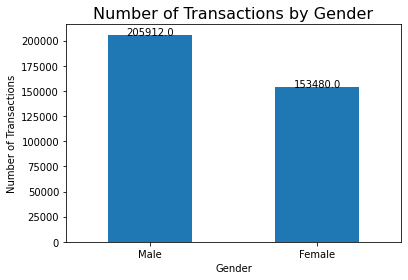

In [36]:
# 1.4 Number of Transactions by Gender
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df['Gender'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.18,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Transactions")
plt.xlabel("Gender")
plt.xticks([0.25, 0.75], ['Male', 'Female'])
plt.xlim(0,1)
plt.title("Number of Transactions by Gender", fontsize=16)

plt.show()

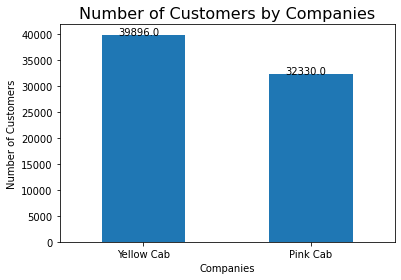

In [37]:
# 2.1 Number of Customers by Companies
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df_dedupe2['Company'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.175,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Customers")
plt.xlabel("Companies")
plt.xticks([0.25, 0.75], ['Yellow Cab', 'Pink Cab'])
plt.xlim(0,1)
plt.title("Number of Customers by Companies", fontsize=16)

plt.show()

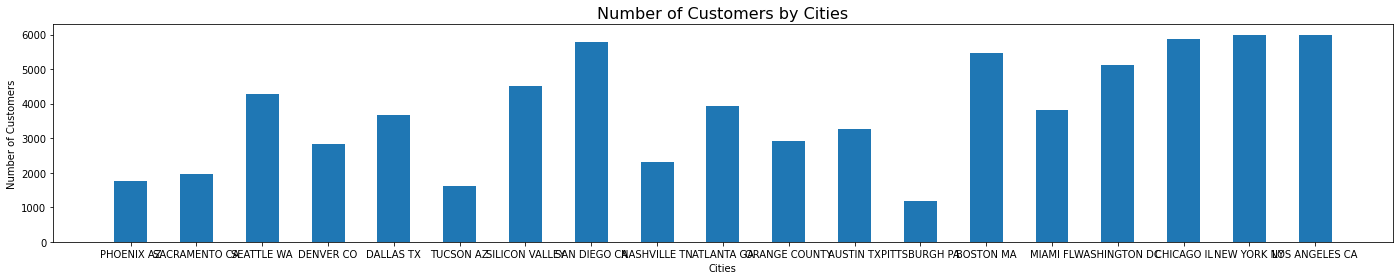

In [38]:
# 2.2 Number of Customers by Cities
plt.figure(figsize=(24,4))
plt.hist(df_dedupe2['City'], np.arange(20)-0.5, rwidth=.5)
plt.ylabel("Number of Customers")
plt.xlabel("Cities")
plt.title("Number of Customers by Cities", fontsize=16)

plt.show()

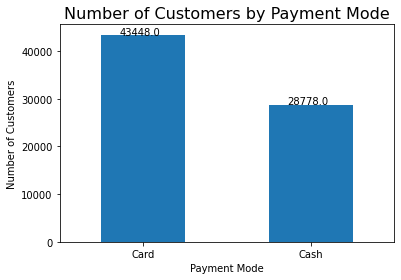

In [39]:
# 2.3 Number of Customers by Payment Method
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df_dedupe2['Payment_Mode'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.18,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Customers")
plt.xlabel("Payment Mode")
plt.xticks([0.25, 0.75], ['Card', 'Cash'])
plt.xlim(0,1)
plt.title("Number of Customers by Payment Mode", fontsize=16)

plt.show()

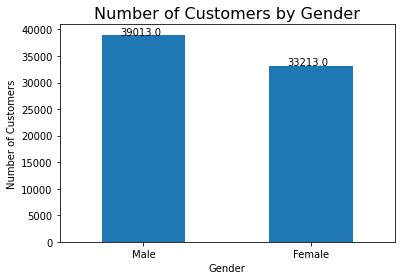

In [40]:
# 2.4 Number of Customers by Gender
plt.figure(figsize=(6,4))
#bins = np.arange(3)-0.5
bins = 2
arr = plt.hist(df_dedupe2['Gender'], bins, rwidth=.5)

for i in range(bins):
    plt.text(arr[1][i]+0.18,arr[0][i],str(arr[0][i]))

plt.ylabel("Number of Customers")
plt.xlabel("Gender")
plt.xticks([0.25, 0.75], ['Male', 'Female'])
plt.xlim(0,1)
plt.title("Number of Customers by Gender", fontsize=16)

plt.show()

In [41]:
# 3.1 Number of Transactions by Companies by Cities
company_city_grp1 = df.groupby(['City', 'Company'])['Transaction ID'].count()
company_city_grp1 = pd.DataFrame(company_city_grp1).reset_index()

yellow_grp1 = company_city_grp1[company_city_grp1['Company']=='Yellow Cab'].sort_values(by='Transaction ID', ascending=False)
#yellow_grp1 = yellow_grp1.set_index('City')
#yellow_grp1 = yellow_grp1.reindex(index=df_city['City'])
#yellow_grp1 = yellow_grp1.reset_index()
pink_grp1 = company_city_grp1[company_city_grp1['Company']=='Pink Cab'].sort_values(by='Transaction ID', ascending=False)
pink_grp1 = pink_grp1.set_index('City')
#pink_grp1 = pink_grp1.reindex(index=df_city['City'])
pink_grp1 = pink_grp1.reindex(index=yellow_grp1['City'])
pink_grp1 = pink_grp1.reset_index()

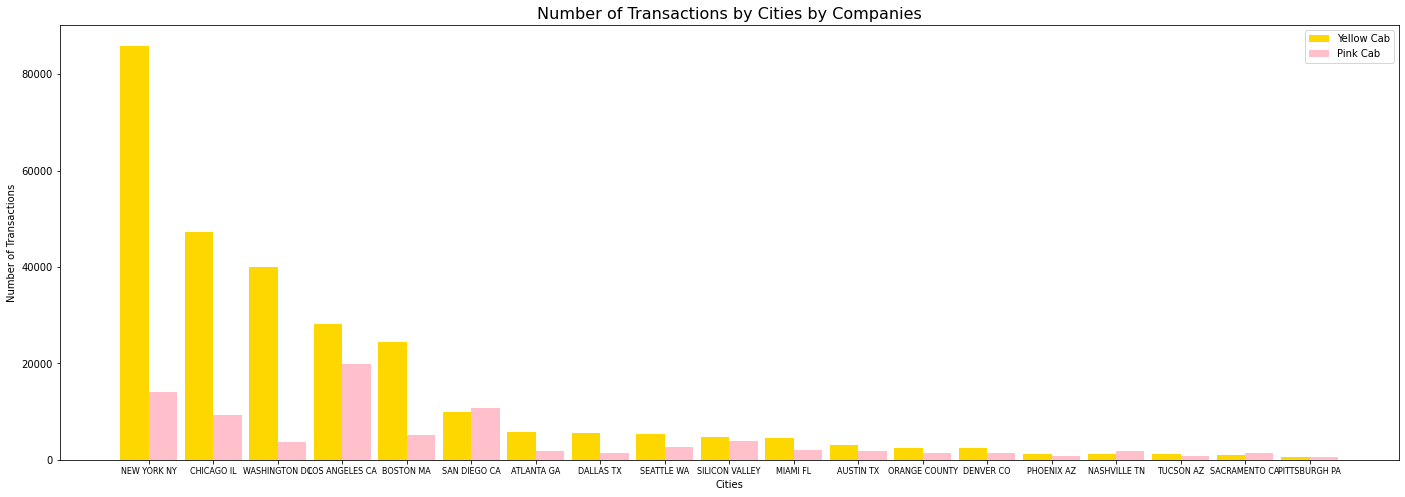

In [42]:
fig, ax = plt.subplots(figsize=(24,8))

X = yellow_grp1['City'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp1['Transaction ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp1['Transaction ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Transactions")
plt.xlabel("Cities")
plt.xticks(fontsize=8)
plt.title("Number of Transactions by Cities by Companies", fontsize=16)
plt.legend()

plt.show()

In [43]:
# 3.2 Number of Transactions by Companies by Payment Methods
company_payment_grp1 = df.groupby(['Payment_Mode', 'Company'])['Transaction ID'].count()
company_payment_grp1 = pd.DataFrame(company_payment_grp1).reset_index()

yellow_grp2 = company_payment_grp1[company_payment_grp1['Company']=='Yellow Cab']
pink_grp2 = company_payment_grp1[company_payment_grp1['Company']=='Pink Cab']

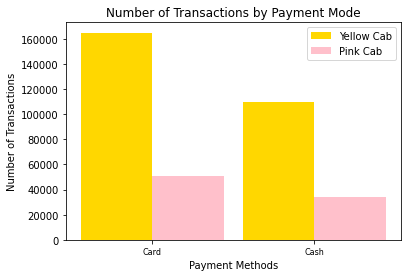

In [44]:
fig, ax = plt.subplots(figsize=(6,4))

X = yellow_grp2['Payment_Mode'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp2['Transaction ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp2['Transaction ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Methods")
plt.xticks(fontsize=8)
plt.title("Number of Transactions by Payment Mode")
plt.legend()

plt.show()

In [45]:
# 3.3 Number of Transactions by Companies by Gender
company_gender_grp1 = df.groupby(['Gender', 'Company'])['Transaction ID'].count()
company_gender_grp1 = pd.DataFrame(company_gender_grp1).reset_index()

yellow_grp3 = company_gender_grp1[company_gender_grp1['Company']=='Yellow Cab']
pink_grp3 = company_gender_grp1[company_gender_grp1['Company']=='Pink Cab']

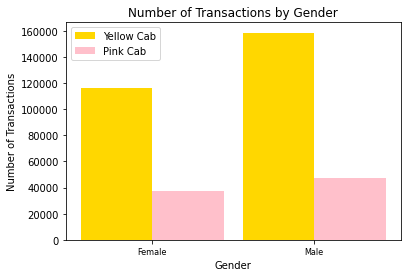

In [46]:
fig, ax = plt.subplots(figsize=(6,4))

X = yellow_grp3['Gender'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp3['Transaction ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp3['Transaction ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Transactions")
plt.xlabel("Gender")
plt.xticks(fontsize=8)
plt.title("Number of Transactions by Gender")
plt.legend()

plt.show()

In [47]:
# 4.1 Number of Customers by Companies by Cities
company_city_grp2 = df_dedupe2.groupby(['City', 'Company'])['Customer ID'].count()
company_city_grp2 = pd.DataFrame(company_city_grp2).reset_index()

yellow_grp4 = company_city_grp2[company_city_grp2['Company']=='Yellow Cab'].sort_values(by='Customer ID', ascending=False)
pink_grp4 = company_city_grp2[company_city_grp2['Company']=='Pink Cab'].sort_values(by='Customer ID', ascending=False)
pink_grp4 = pink_grp4.set_index('City')
pink_grp4 = pink_grp4.reindex(index=yellow_grp4['City'])
pink_grp4 = pink_grp4.reset_index()

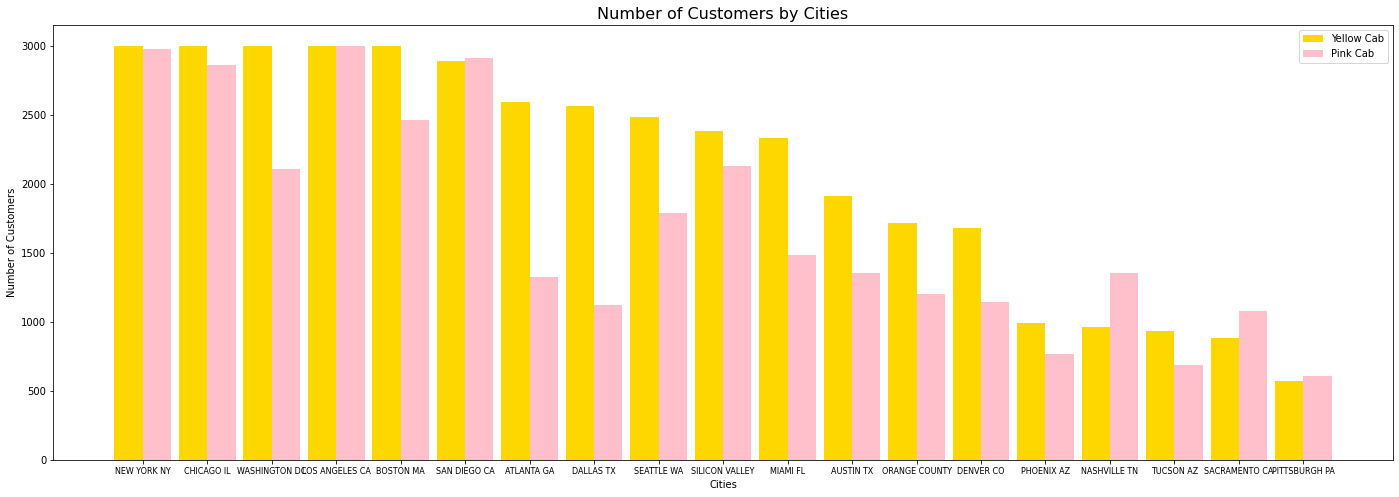

In [48]:
fig, ax = plt.subplots(figsize=(24,8))

X = yellow_grp4['City'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp4['Customer ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp4['Customer ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Customers")
plt.xlabel("Cities")
plt.xticks(fontsize=8)
plt.title("Number of Customers by Cities", fontsize=16)
plt.legend()

plt.show()

In [49]:
# 4.2 Number of Customers by Companies by Payment Methods
company_payment_grp2 = df_dedupe2.groupby(['Payment_Mode', 'Company'])['Customer ID'].count()
company_payment_grp2 = pd.DataFrame(company_payment_grp2).reset_index()

yellow_grp5 = company_payment_grp2[company_payment_grp2['Company']=='Yellow Cab']
pink_grp5 = company_payment_grp2[company_payment_grp2['Company']=='Pink Cab']

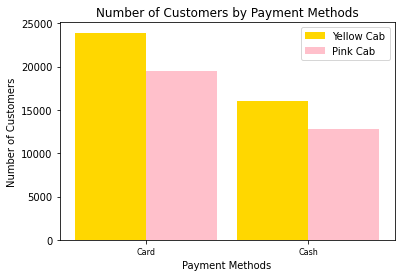

In [50]:
fig, ax = plt.subplots(figsize=(6,4))

X = yellow_grp5['Payment_Mode'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp5['Customer ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp5['Customer ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Customers")
plt.xlabel("Payment Methods")
plt.xticks(fontsize=8)
plt.title("Number of Customers by Payment Methods")
plt.legend()

plt.show()

In [51]:
# 4.3 Number of Customers by Companies by Gender
company_gender_grp2 = df_dedupe2.groupby(['Gender', 'Company'])['Customer ID'].count()
company_gender_grp2 = pd.DataFrame(company_gender_grp2).reset_index()

yellow_grp6 = company_gender_grp2[company_gender_grp2['Company']=='Yellow Cab']
pink_grp6 = company_gender_grp2[company_gender_grp2['Company']=='Pink Cab']

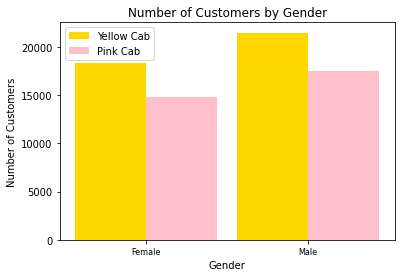

In [52]:
fig, ax = plt.subplots(figsize=(6,4))

X = yellow_grp6['Gender'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, yellow_grp6['Customer ID'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, pink_grp6['Customer ID'], 0.44, color='pink', label='Pink Cab')

#for i, v in enumerate(yellow_grp[['City', 'Transaction ID']]):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(X_axis, X)
plt.ylabel("Number of Customers")
plt.xlabel("Gender")
plt.xticks(fontsize=8)
plt.title("Number of Customers by Gender")
plt.legend()

plt.show()

#### 3.1.3 Numerical

In [53]:
# Descriptive Statistics
df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit per KM']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198,6.083579
std,12.233526,274.378911,157.993661,160.311840,5.543493
min,1.900000,15.600000,19.000000,-220.060000,-4.998235
25%,12.000000,206.437500,151.200000,28.012000,2.000385
50%,22.440000,386.360000,282.480000,81.962000,4.466809
75%,32.960000,583.660000,413.683200,190.030000,9.170006
max,48.000000,2048.030000,691.200000,1463.966000,41.115556


In [54]:
df_dedupe2[['Age', 'Income (USD/Month)', 'Frequency']].describe()

,Age,Income (USD/Month),Frequency
count,72226.000000,72226.000000,72226.000000
mean,35.352311,15006.367845,4.975937
std,12.603270,7996.492452,6.605868
min,18.000000,2000.000000,1.000000
25%,25.000000,8299.000000,1.000000
50%,33.000000,14635.000000,2.000000
75%,42.000000,21029.000000,6.000000
max,65.000000,35000.000000,47.000000


In [55]:
# Averages by Companies
df.groupby(['Company'])[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit per KM']].mean()

,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
Company,,,,,
Pink Cab,22.559917,310.800856,248.148682,62.652174,2.769908
Yellow Cab,22.569517,458.181990,297.922004,160.259986,7.105508


In [56]:
df_dedupe2.groupby(['Company'])[['Age', 'Income (USD/Month)', 'Frequency']].mean()

,Age,Income (USD/Month),Frequency
Company,,,
Pink Cab,35.368791,15034.097618,2.620198
Yellow Cab,35.338956,14983.896832,6.884926


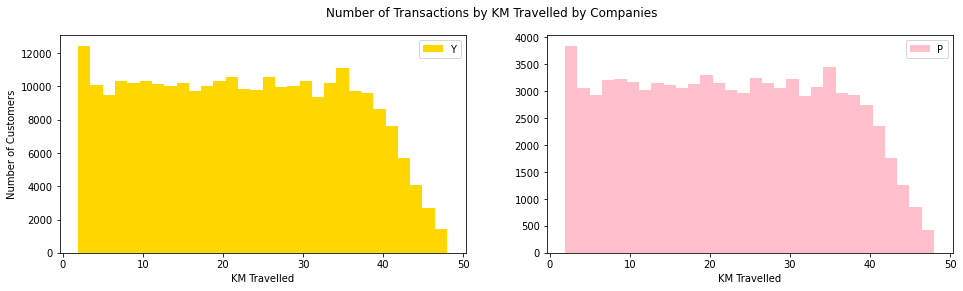

In [57]:
# Distribution Histograms by Companies

# KM Travelled
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by KM Travelled by Companies')
ax1.hist(df[df['Company']=='Yellow Cab']['KM Travelled'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("KM Travelled");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['KM Travelled'], bins=30, color='pink');
ax2.set_xlabel("KM Travelled");
ax2.legend('Pink Cab');

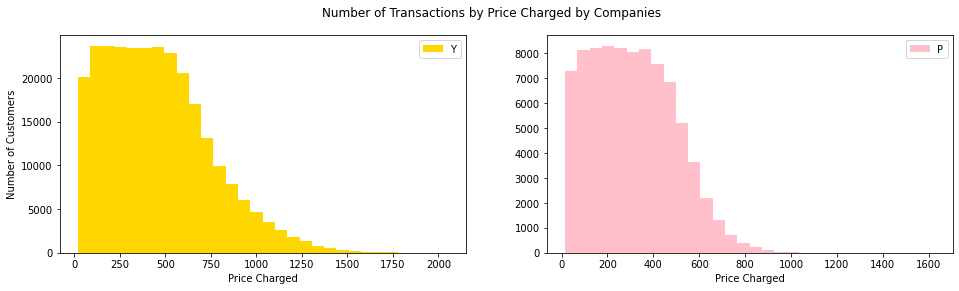

In [58]:
# Price Charged
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Price Charged by Companies')
ax1.hist(df[df['Company']=='Yellow Cab']['Price Charged'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Price Charged");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['Price Charged'], bins=30, color='pink');
ax2.set_xlabel("Price Charged");
ax2.legend('Pink Cab');

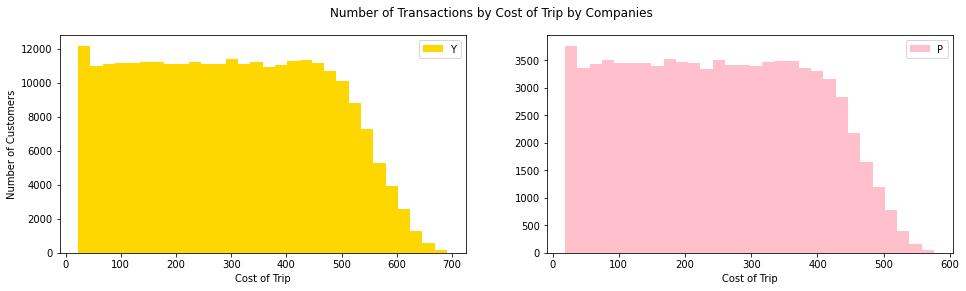

In [59]:
# Cost of Trip
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Cost of Trip by Companies')
ax1.hist(df[df['Company']=='Yellow Cab']['Cost of Trip'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Cost of Trip");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['Cost of Trip'], bins=30, color='pink');
ax2.set_xlabel("Cost of Trip");
ax2.legend('Pink Cab');

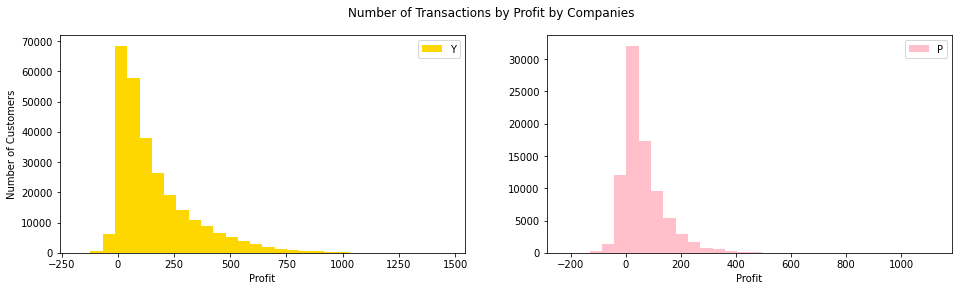

In [60]:
# Profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Profit by Companies')
ax1.hist(df[df['Company']=='Yellow Cab']['Profit'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Profit");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['Profit'], bins=30, color='pink');
ax2.set_xlabel("Profit");
ax2.legend('Pink Cab');

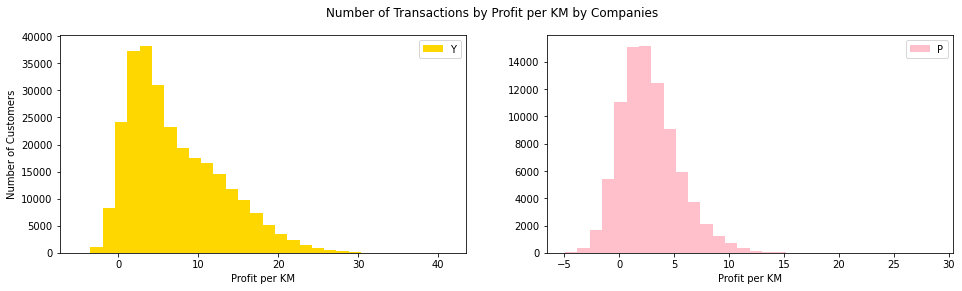

In [61]:
# Profit per KM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Profit per KM by Companies')
ax1.hist(df[df['Company']=='Yellow Cab']['Profit per KM'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Profit per KM");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['Profit per KM'], bins=30, color='pink');
ax2.set_xlabel("Profit per KM");
ax2.legend('Pink Cab');

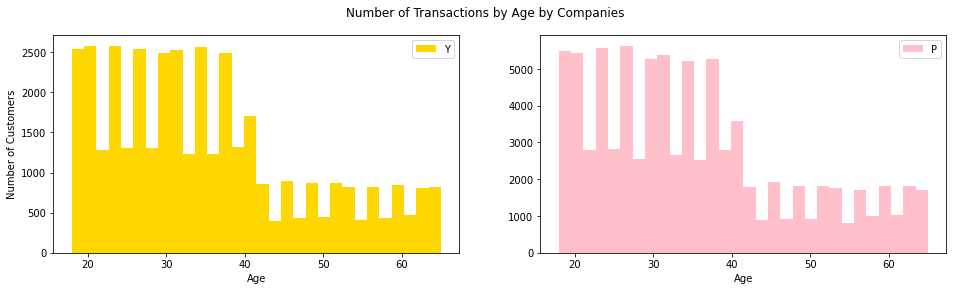

In [62]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Age by Companies')
ax1.hist(df_dedupe2[df_dedupe2['Company']=='Yellow Cab']['Age'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Age");
ax1.legend('Yellow Cab');
ax2.hist(df[df['Company']=='Pink Cab']['Age'], bins=30, color='pink');
ax2.set_xlabel("Age");
ax2.legend('Pink Cab');

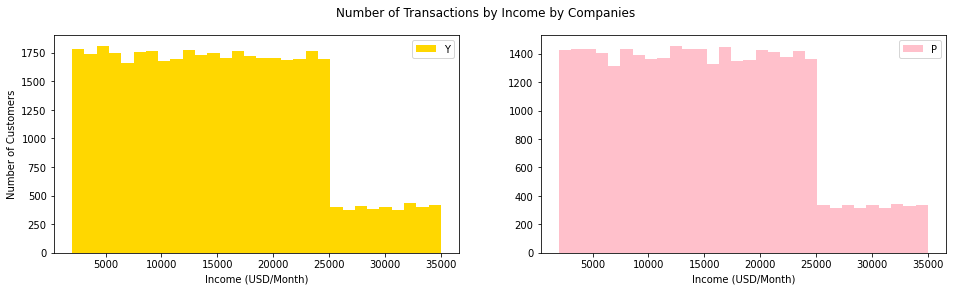

In [63]:
# Income (USD/Month)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Income by Companies')
ax1.hist(df_dedupe2[df_dedupe2['Company']=='Yellow Cab']['Income (USD/Month)'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Income (USD/Month)");
ax1.legend('Yellow Cab');
ax2.hist(df_dedupe2[df_dedupe2['Company']=='Pink Cab']['Income (USD/Month)'], bins=30, color='pink');
ax2.set_xlabel("Income (USD/Month)");
ax2.legend('Pink Cab');

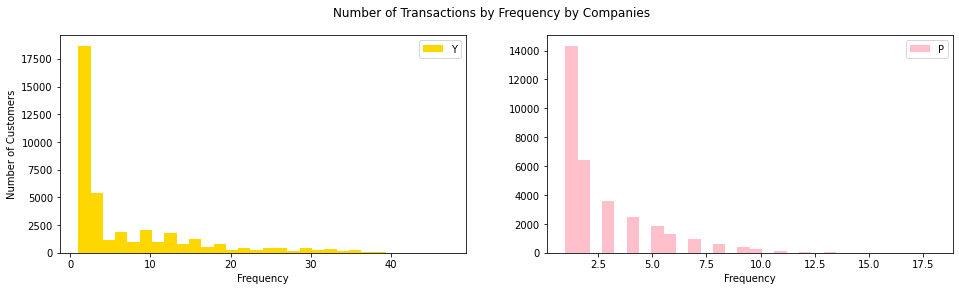

In [64]:
# Frequency
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Number of Transactions by Frequency by Companies')
ax1.hist(df_dedupe2[df_dedupe2['Company']=='Yellow Cab']['Frequency'], bins=30, color='gold');
ax1.set_ylabel("Number of Customers");
ax1.set_xlabel("Frequency");
ax1.legend('Yellow Cab');
ax2.hist(df_dedupe2[df_dedupe2['Company']=='Pink Cab']['Frequency'], bins=30, color='pink');
ax2.set_xlabel("Frequency");
ax2.legend('Pink Cab');

### 3.2 Correlation Analysis

#### 3.2.1 Categorical

In [65]:
from scipy.stats import chi2_contingency
# Chi-Square Test

# Transactions
# ----Company/City
c, p, dof, expected = chi2_contingency(pd.crosstab(df.Company, df.City, margins=True))
print("p_value: ",round(p,3))

p_value:  0.0


In [66]:
# Company/Payment
c, p, dof, expected = chi2_contingency(pd.crosstab(df.Company, df.Payment_Mode, margins=True))
print("p_value: ",round(p,3))

p_value:  0.984


In [67]:
# ----Company/Gender
c, p, dof, expected = chi2_contingency(pd.crosstab(df.Company, df.Gender, margins=True))
print("p_value: ",round(p,3))

p_value:  0.0


In [68]:
# ----City/Gender
c, p, dof, expected = chi2_contingency(pd.crosstab(df.City, df.Gender, margins=True))
print("p_value: ",round(p,3))

p_value:  0.0


In [69]:
# Customers
# ----Company/City
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe2.Company, df_dedupe2.City, margins=True))
print("p_value: ",round(p,3))

p_value:  0.0


In [70]:
# Company/Payment
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe2.Company, df_dedupe2.Payment_Mode, margins=True))
print("p_value: ",round(p,3))

p_value:  0.788


In [71]:
# Company/Gender
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe2.Company, df_dedupe2.Gender, margins=True))
print("p_value: ",round(p,3))

p_value:  0.972


Based on above Chi-Square test results, it is obvious that:
1. As for number of transactions, here are significant correlations between companies, cities and gender.
2. As for number of customers, here are significant oorrelation between between companies and cities.

#### 3.2.2 Numerical

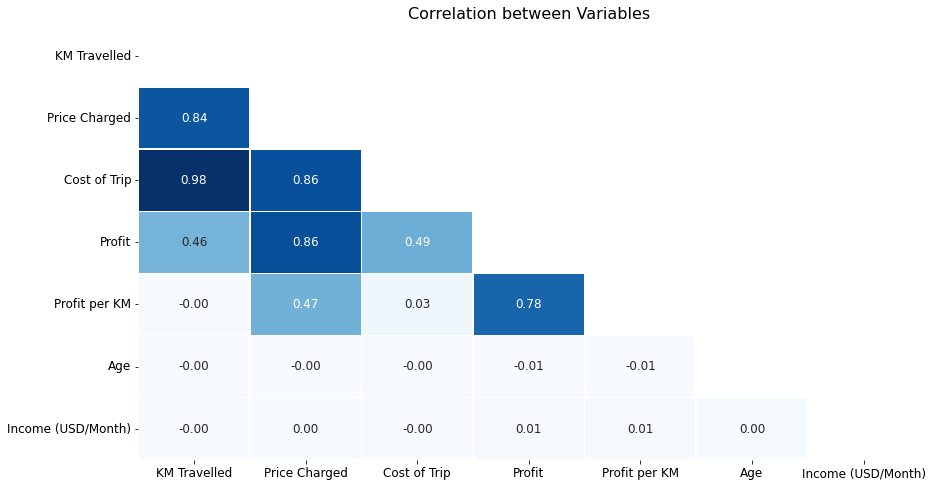

In [72]:
# Heatmap

# Transactions
corr1 = df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit per KM', 'Age', 'Income (USD/Month)']].corr()

mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['font.size'] = 12
plt.figure(figsize = (14,8))
ax = sns.heatmap(corr1, annot=True, fmt=".2f", linewidth=0.5, mask=mask, cmap='Blues', cbar=False)
plt.title('Correlation between Variables', fontsize=16, x=0.5, y=1)
plt.xticks(rotation=0)
plt.show()

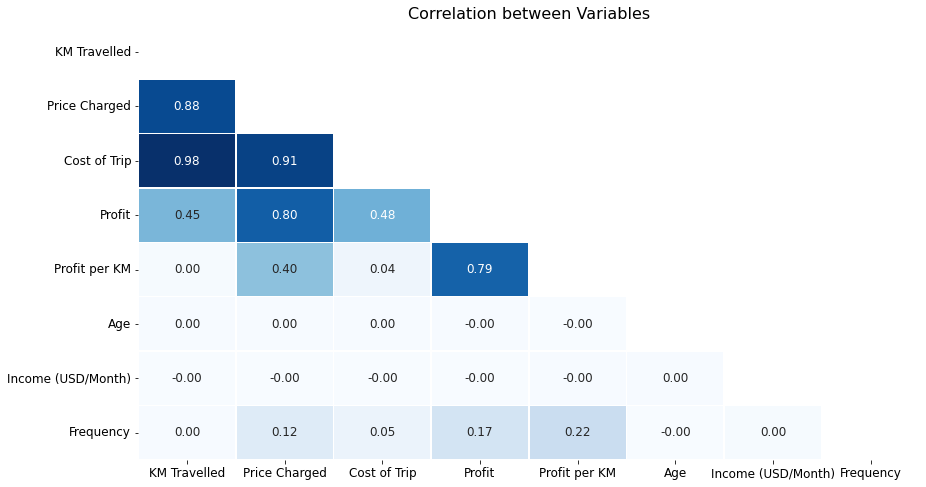

In [73]:
# Customers
corr2 = df_dedupe2[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit per KM',
                    'Age', 'Income (USD/Month)', 'Frequency']].corr()

mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['font.size'] = 12
plt.figure(figsize = (14,8))
ax = sns.heatmap(corr2, annot=True, fmt=".2f", linewidth=0.5, mask=mask, cmap='Blues', cbar=False)
plt.title('Correlation between Variables', fontsize=16, x=0.5, y=1)
plt.xticks(rotation=0)
plt.show()

We can observe from the correlation heatmaps that KM Travelled, Cost of Trip, Price Charged, Profit and Profit per KM are highly related.

#### 3.2.3 Categorical vs. Numerical

In [74]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

# Transactions
# ----Company/Profit
fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Profit'],
                                df.query('Company=="Yellow Cab"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [75]:
# ----Company/Profit per KM
fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Profit per KM'],
                                df.query('Company=="Yellow Cab"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [76]:
# Company/Age
fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Age'],
                                df.query('Company=="Yellow Cab"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.706


In [77]:
# Company/Income
fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Income (USD/Month)'],
                                df.query('Company=="Yellow Cab"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.669


In [78]:
# ----City/Profit
fvalue, pvalue = stats.f_oneway(df.query('City=="NEW YORK NY"')['Profit'],
                                df.query('City=="CHICAGO IL"')['Profit'],
                                df.query('City=="LOS ANGELES CA"')['Profit'],
                                df.query('City=="MIAMI FL"')['Profit'],
                                df.query('City=="SILICON VALLEY"')['Profit'],
                                df.query('City=="ORANGE COUNTY"')['Profit'],
                                df.query('City=="SAN DIEGO CA"')['Profit'],
                                df.query('City=="PHOENIX AZ"')['Profit'],
                                df.query('City=="DALLAS TX"')['Profit'],
                                df.query('City=="ATLANTA GA"')['Profit'],
                                df.query('City=="DENVER CO"')['Profit'],
                                df.query('City=="AUSTIN TX"')['Profit'],
                                df.query('City=="SEATTLE WA"')['Profit'],
                                df.query('City=="TUCSON AZ"')['Profit'],
#                                df.query('City=="SAN FRANCISCO CA"')['Profit'],
                                df.query('City=="SACRAMENTO CA"')['Profit'],
                                df.query('City=="PITTSBURGH PA"')['Profit'],
                                df.query('City=="WASHINGTON DC"')['Profit'],
                                df.query('City=="NASHVILLE TN"')['Profit'],
                                df.query('City=="BOSTON MA"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [79]:
# ----City/Profit per KM
fvalue, pvalue = stats.f_oneway(df.query('City=="NEW YORK NY"')['Profit per KM'],
                                df.query('City=="CHICAGO IL"')['Profit per KM'],
                                df.query('City=="LOS ANGELES CA"')['Profit per KM'],
                                df.query('City=="MIAMI FL"')['Profit per KM'],
                                df.query('City=="SILICON VALLEY"')['Profit per KM'],
                                df.query('City=="ORANGE COUNTY"')['Profit per KM'],
                                df.query('City=="SAN DIEGO CA"')['Profit per KM'],
                                df.query('City=="PHOENIX AZ"')['Profit per KM'],
                                df.query('City=="DALLAS TX"')['Profit per KM'],
                                df.query('City=="ATLANTA GA"')['Profit per KM'],
                                df.query('City=="DENVER CO"')['Profit per KM'],
                                df.query('City=="AUSTIN TX"')['Profit per KM'],
                                df.query('City=="SEATTLE WA"')['Profit per KM'],
                                df.query('City=="TUCSON AZ"')['Profit per KM'],
#                                df.query('City=="SAN FRANCISCO CA"')['Profit per KM'],
                                df.query('City=="SACRAMENTO CA"')['Profit per KM'],
                                df.query('City=="PITTSBURGH PA"')['Profit per KM'],
                                df.query('City=="WASHINGTON DC"')['Profit per KM'],
                                df.query('City=="NASHVILLE TN"')['Profit per KM'],
                                df.query('City=="BOSTON MA"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [80]:
# ----City/Age
fvalue, pvalue = stats.f_oneway(df.query('City=="NEW YORK NY"')['Age'],
                                df.query('City=="CHICAGO IL"')['Age'],
                                df.query('City=="LOS ANGELES CA"')['Age'],
                                df.query('City=="MIAMI FL"')['Age'],
                                df.query('City=="SILICON VALLEY"')['Age'],
                                df.query('City=="ORANGE COUNTY"')['Age'],
                                df.query('City=="SAN DIEGO CA"')['Age'],
                                df.query('City=="PHOENIX AZ"')['Age'],
                                df.query('City=="DALLAS TX"')['Age'],
                                df.query('City=="ATLANTA GA"')['Age'],
                                df.query('City=="DENVER CO"')['Age'],
                                df.query('City=="AUSTIN TX"')['Age'],
                                df.query('City=="SEATTLE WA"')['Age'],
                                df.query('City=="TUCSON AZ"')['Age'],
                                df.query('City=="SACRAMENTO CA"')['Age'],
                                df.query('City=="PITTSBURGH PA"')['Age'],
                                df.query('City=="WASHINGTON DC"')['Age'],
                                df.query('City=="NASHVILLE TN"')['Age'],
                                df.query('City=="BOSTON MA"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [81]:
# ----City/Income
fvalue, pvalue = stats.f_oneway(df.query('City=="NEW YORK NY"')['Income (USD/Month)'],
                                df.query('City=="CHICAGO IL"')['Income (USD/Month)'],
                                df.query('City=="LOS ANGELES CA"')['Income (USD/Month)'],
                                df.query('City=="MIAMI FL"')['Income (USD/Month)'],
                                df.query('City=="SILICON VALLEY"')['Income (USD/Month)'],
                                df.query('City=="ORANGE COUNTY"')['Income (USD/Month)'],
                                df.query('City=="SAN DIEGO CA"')['Income (USD/Month)'],
                                df.query('City=="PHOENIX AZ"')['Income (USD/Month)'],
                                df.query('City=="DALLAS TX"')['Income (USD/Month)'],
                                df.query('City=="ATLANTA GA"')['Income (USD/Month)'],
                                df.query('City=="DENVER CO"')['Income (USD/Month)'],
                                df.query('City=="AUSTIN TX"')['Income (USD/Month)'],
                                df.query('City=="SEATTLE WA"')['Income (USD/Month)'],
                                df.query('City=="TUCSON AZ"')['Income (USD/Month)'],
                                df.query('City=="SACRAMENTO CA"')['Income (USD/Month)'],
                                df.query('City=="PITTSBURGH PA"')['Income (USD/Month)'],
                                df.query('City=="WASHINGTON DC"')['Income (USD/Month)'],
                                df.query('City=="NASHVILLE TN"')['Income (USD/Month)'],
                                df.query('City=="BOSTON MA"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [82]:
# ----Gender/Profit
fvalue, pvalue = stats.f_oneway(df.query('Gender=="Female"')['Profit'],
                                df.query('Gender=="Male"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [83]:
# ----Gender/Profit per KM
fvalue, pvalue = stats.f_oneway(df.query('Gender=="Female"')['Profit per KM'],
                                df.query('Gender=="Male"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [84]:
# ----Gender/Age
fvalue, pvalue = stats.f_oneway(df.query('Gender=="Female"')['Age'],
                                df.query('Gender=="Male"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.044


In [85]:
# Gender/Income
fvalue, pvalue = stats.f_oneway(df.query('Gender=="Female"')['Income (USD/Month)'],
                                df.query('Gender=="Male"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.553


In [86]:
# Customers
# ----Company/Profit
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Company=="Pink Cab"')['Profit'],
                                df_dedupe2.query('Company=="Yellow Cab"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [87]:
# ----Company/Profit per KM
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Company=="Pink Cab"')['Profit per KM'],
                                df_dedupe2.query('Company=="Yellow Cab"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [88]:
# Company/Age
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Company=="Pink Cab"')['Age'],
                                df_dedupe2.query('Company=="Yellow Cab"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.752


In [89]:
# Company/Income
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Company=="Pink Cab"')['Income (USD/Month)'],
                                df_dedupe2.query('Company=="Yellow Cab"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.402


In [90]:
# ----Company/Frequency
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Company=="Pink Cab"')['Frequency'],
                                df_dedupe2.query('Company=="Yellow Cab"')['Frequency'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [91]:
# ----City/Profit
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('City=="NEW YORK NY"')['Profit'],
                                df_dedupe2.query('City=="CHICAGO IL"')['Profit'],
                                df_dedupe2.query('City=="LOS ANGELES CA"')['Profit'],
                                df_dedupe2.query('City=="MIAMI FL"')['Profit'],
                                df_dedupe2.query('City=="SILICON VALLEY"')['Profit'],
                                df_dedupe2.query('City=="ORANGE COUNTY"')['Profit'],
                                df_dedupe2.query('City=="SAN DIEGO CA"')['Profit'],
                                df_dedupe2.query('City=="PHOENIX AZ"')['Profit'],
                                df_dedupe2.query('City=="DALLAS TX"')['Profit'],
                                df_dedupe2.query('City=="ATLANTA GA"')['Profit'],
                                df_dedupe2.query('City=="DENVER CO"')['Profit'],
                                df_dedupe2.query('City=="AUSTIN TX"')['Profit'],
                                df_dedupe2.query('City=="SEATTLE WA"')['Profit'],
                                df_dedupe2.query('City=="TUCSON AZ"')['Profit'],
                                df_dedupe2.query('City=="SACRAMENTO CA"')['Profit'],
                                df_dedupe2.query('City=="PITTSBURGH PA"')['Profit'],
                                df_dedupe2.query('City=="WASHINGTON DC"')['Profit'],
                                df_dedupe2.query('City=="NASHVILLE TN"')['Profit'],
                                df_dedupe2.query('City=="BOSTON MA"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [92]:
# ----City/Profit per km
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('City=="NEW YORK NY"')['Profit per KM'],
                                df_dedupe2.query('City=="CHICAGO IL"')['Profit per KM'],
                                df_dedupe2.query('City=="LOS ANGELES CA"')['Profit per KM'],
                                df_dedupe2.query('City=="MIAMI FL"')['Profit per KM'],
                                df_dedupe2.query('City=="SILICON VALLEY"')['Profit per KM'],
                                df_dedupe2.query('City=="ORANGE COUNTY"')['Profit per KM'],
                                df_dedupe2.query('City=="SAN DIEGO CA"')['Profit per KM'],
                                df_dedupe2.query('City=="PHOENIX AZ"')['Profit per KM'],
                                df_dedupe2.query('City=="DALLAS TX"')['Profit per KM'],
                                df_dedupe2.query('City=="ATLANTA GA"')['Profit per KM'],
                                df_dedupe2.query('City=="DENVER CO"')['Profit per KM'],
                                df_dedupe2.query('City=="AUSTIN TX"')['Profit per KM'],
                                df_dedupe2.query('City=="SEATTLE WA"')['Profit per KM'],
                                df_dedupe2.query('City=="TUCSON AZ"')['Profit per KM'],
                                df_dedupe2.query('City=="SACRAMENTO CA"')['Profit per KM'],
                                df_dedupe2.query('City=="PITTSBURGH PA"')['Profit per KM'],
                                df_dedupe2.query('City=="WASHINGTON DC"')['Profit per KM'],
                                df_dedupe2.query('City=="NASHVILLE TN"')['Profit per KM'],
                                df_dedupe2.query('City=="BOSTON MA"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [93]:
# ----City/Age
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('City=="NEW YORK NY"')['Age'],
                                df_dedupe2.query('City=="CHICAGO IL"')['Age'],
                                df_dedupe2.query('City=="LOS ANGELES CA"')['Age'],
                                df_dedupe2.query('City=="MIAMI FL"')['Age'],
                                df_dedupe2.query('City=="SILICON VALLEY"')['Age'],
                                df_dedupe2.query('City=="ORANGE COUNTY"')['Age'],
                                df_dedupe2.query('City=="SAN DIEGO CA"')['Age'],
                                df_dedupe2.query('City=="PHOENIX AZ"')['Age'],
                                df_dedupe2.query('City=="DALLAS TX"')['Age'],
                                df_dedupe2.query('City=="ATLANTA GA"')['Age'],
                                df_dedupe2.query('City=="DENVER CO"')['Age'],
                                df_dedupe2.query('City=="AUSTIN TX"')['Age'],
                                df_dedupe2.query('City=="SEATTLE WA"')['Age'],
                                df_dedupe2.query('City=="TUCSON AZ"')['Age'],
#                                df_dedupe2.query('City=="SAN FRANCISCO CA"')['Age'],
                                df_dedupe2.query('City=="SACRAMENTO CA"')['Age'],
                                df_dedupe2.query('City=="PITTSBURGH PA"')['Age'],
                                df_dedupe2.query('City=="WASHINGTON DC"')['Age'],
                                df_dedupe2.query('City=="NASHVILLE TN"')['Age'],
                                df_dedupe2.query('City=="BOSTON MA"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [94]:
# ----City/Income
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('City=="NEW YORK NY"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="CHICAGO IL"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="LOS ANGELES CA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="MIAMI FL"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="SILICON VALLEY"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="ORANGE COUNTY"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="SAN DIEGO CA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="PHOENIX AZ"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="DALLAS TX"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="ATLANTA GA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="DENVER CO"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="AUSTIN TX"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="SEATTLE WA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="TUCSON AZ"')['Income (USD/Month)'],
#                                df_dedupe2.query('City=="SAN FRANCISCO CA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="SACRAMENTO CA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="PITTSBURGH PA"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="WASHINGTON DC"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="NASHVILLE TN"')['Income (USD/Month)'],
                                df_dedupe2.query('City=="BOSTON MA"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.019


In [95]:
# ----City/Frequency
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('City=="NEW YORK NY"')['Frequency'],
                                df_dedupe2.query('City=="CHICAGO IL"')['Frequency'],
                                df_dedupe2.query('City=="LOS ANGELES CA"')['Frequency'],
                                df_dedupe2.query('City=="MIAMI FL"')['Frequency'],
                                df_dedupe2.query('City=="SILICON VALLEY"')['Frequency'],
                                df_dedupe2.query('City=="ORANGE COUNTY"')['Frequency'],
                                df_dedupe2.query('City=="SAN DIEGO CA"')['Frequency'],
                                df_dedupe2.query('City=="PHOENIX AZ"')['Frequency'],
                                df_dedupe2.query('City=="DALLAS TX"')['Frequency'],
                                df_dedupe2.query('City=="ATLANTA GA"')['Frequency'],
                                df_dedupe2.query('City=="DENVER CO"')['Frequency'],
                                df_dedupe2.query('City=="AUSTIN TX"')['Frequency'],
                                df_dedupe2.query('City=="SEATTLE WA"')['Frequency'],
                                df_dedupe2.query('City=="TUCSON AZ"')['Frequency'],
                                df_dedupe2.query('City=="SACRAMENTO CA"')['Frequency'],
                                df_dedupe2.query('City=="PITTSBURGH PA"')['Frequency'],
                                df_dedupe2.query('City=="WASHINGTON DC"')['Frequency'],
                                df_dedupe2.query('City=="NASHVILLE TN"')['Frequency'],
                                df_dedupe2.query('City=="BOSTON MA"')['Frequency'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [96]:
# Gender/Profit
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Gender=="Female"')['Profit'],
                                df_dedupe2.query('Gender=="Male"')['Profit'])
print("p_value: ",round(pvalue,3))

p_value:  0.89


In [97]:
# Gender/Profit per KM
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Gender=="Female"')['Profit per KM'],
                                df_dedupe2.query('Gender=="Male"')['Profit per KM'])
print("p_value: ",round(pvalue,3))

p_value:  0.667


In [98]:
# Gender/Age
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Gender=="Female"')['Age'],
                                df_dedupe2.query('Gender=="Male"')['Age'])
print("p_value: ",round(pvalue,3))

p_value:  0.257


In [99]:
# Gender/Income
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Gender=="Female"')['Income (USD/Month)'],
                                df_dedupe2.query('Gender=="Male"')['Income (USD/Month)'])
print("p_value: ",round(pvalue,3))

p_value:  0.233


In [100]:
# ----Gender/Frequency
fvalue, pvalue = stats.f_oneway(df_dedupe2.query('Gender=="Female"')['Frequency'],
                                df_dedupe2.query('Gender=="Male"')['Frequency'])
print("p_value: ",round(pvalue,3))

p_value:  0.0


1. Company/City/Gender: Profit/Profit per KM
2. City:Age/Income
3. Gender: Age


4. Company/City: Profit/Profit per KM/Frequency
5. City:Age/Income
6. Gender: Frequency

In [101]:
# Transactions
# Company/Profit/Profit per KM
df.groupby(['Company'])[['Profit', 'Profit per KM']].mean()

,Profit,Profit per KM
Company,,
Pink Cab,62.652174,2.769908
Yellow Cab,160.259986,7.105508


In [102]:
# Customers
# Company/Profit/Profit per KM
df_dedupe2.groupby(['Company'])[['Profit', 'Profit per KM']].mean()

,Profit,Profit per KM
Company,,
Pink Cab,56.421298,2.489349
Yellow Cab,113.501048,5.026119


In [103]:
# Gender/Frequency
df_dedupe2.groupby(['Gender'])[['Frequency']].mean()

,Frequency
Gender,
Female,4.621082
Male,5.278036


We can observe from Chi-Square test, the correlation heatmap and t-test ANOVA that there are significant correlation between following variables on the confidence level of 95%:
1. Company - City: highly related
2. KM Travelled - Cost of Trip - Price Charged - Profit - Profit per KM: highly related.

Transactions:
3. Company/City/Gender - Profit/Profit per KM
4. City - Age/Income
5. Gender - Age

Customers:
6. Company/City - Profit/Profit per KM/Frequency
7. City - Age/Income
8. Gender - Frequency

Yellow Cab higher profit and profit per KM mainly in bigger cities except Chicago.
Yellow Cab had more male customer with higher frequency of taking Cabs.
Yellow Cab made more businesses in bigger cities with higher frequency of taking cabs.
Yellow Cab higher profit and profit per KM mainly in bigger cities except Chicago.

### 3.3 Contextual Analysis

#### 3.3.1 Seasonality: Yearly & Monthly

In [104]:
# Number of Transactions across months of years
trans_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

In [105]:
trans_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

In [106]:
trans_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

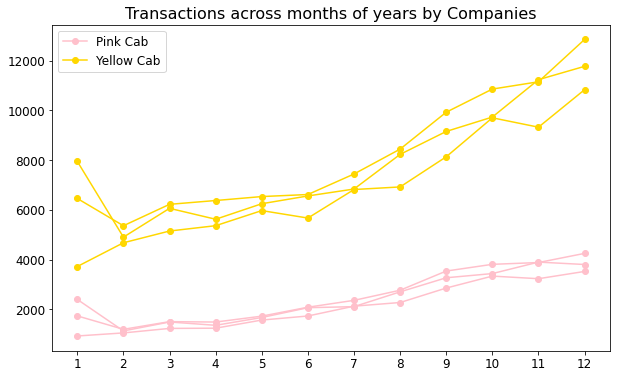

In [107]:
plt.figure(figsize=(10,6))
plt.plot(trans_grp1, marker = 'o', color = 'pink');
plt.plot(trans_grp2, marker = 'o', color = 'gold');
plt.plot(trans_grp3, marker = 'o', color = 'pink');
plt.plot(trans_grp4, marker = 'o', color = 'gold');
plt.plot(trans_grp5, marker = 'o', color = 'pink');
plt.plot(trans_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Transactions across months of years by Companies', fontsize=16);

In [108]:
# Number of Customers across months of years
cust_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()
cust_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()

In [109]:
cust_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()
cust_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()

In [110]:
cust_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()
cust_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Customer ID'].nunique()

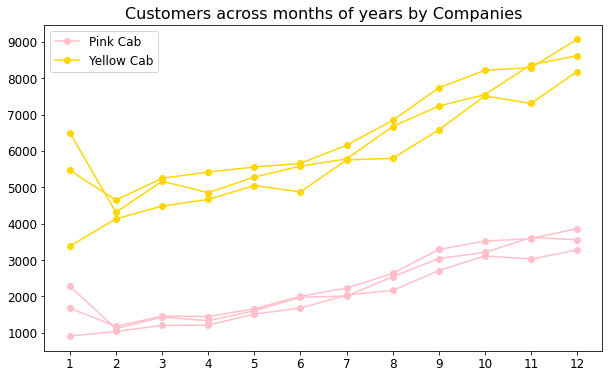

In [111]:
plt.figure(figsize=(10,6))
plt.plot(cust_grp1, marker = 'o', color = 'pink');
plt.plot(cust_grp2, marker = 'o', color = 'gold');
plt.plot(cust_grp3, marker = 'o', color = 'pink');
plt.plot(cust_grp4, marker = 'o', color = 'gold');
plt.plot(cust_grp5, marker = 'o', color = 'pink');
plt.plot(cust_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Customers across months of years by Companies', fontsize=16);

In [112]:
# Average Profit per KM of each transaction across months of years
profitper_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()
profitper_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()

In [113]:
profitper_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()
profitper_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()

In [114]:
profitper_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()
profitper_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Profit per KM'].mean()

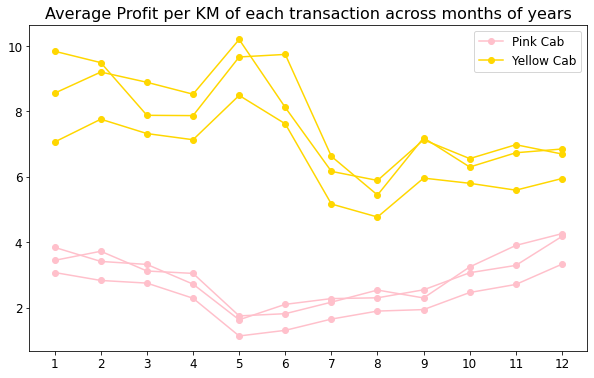

In [115]:
plt.figure(figsize=(10,6))
plt.plot(profitper_grp1, marker = 'o', color = 'pink');
plt.plot(profitper_grp2, marker = 'o', color = 'gold');
plt.plot(profitper_grp3, marker = 'o', color = 'pink');
plt.plot(profitper_grp4, marker = 'o', color = 'gold');
plt.plot(profitper_grp5, marker = 'o', color = 'pink');
plt.plot(profitper_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Average Profit per KM of each transaction across months of years', fontsize=16);

We can see similar trends of Transactions/Customers/Profit per KM: overall decreases from the first half of years to the latter half of the years.

#### 3.3.2 Seasonality: Monthly & Daily

In [116]:
# Number of Transactions across days of Decembers
trans_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()
trans_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()

In [117]:
trans_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()
trans_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()

In [118]:
trans_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()
trans_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Date of Travel'].dt.month==12) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.day)['Transaction ID'].count()

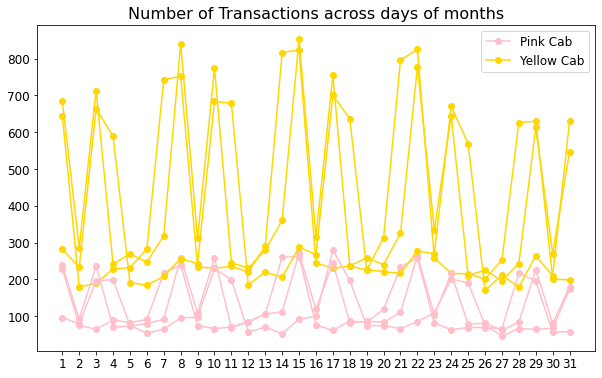

In [119]:
plt.figure(figsize=(10,6))
plt.plot(trans_grp1, marker = 'o', color = 'pink');
plt.plot(trans_grp2, marker = 'o', color = 'gold');
plt.plot(trans_grp3, marker = 'o', color = 'pink');
plt.plot(trans_grp4, marker = 'o', color = 'gold');
plt.plot(trans_grp5, marker = 'o', color = 'pink');
plt.plot(trans_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 32, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Number of Transactions across days of months', fontsize=16);

In [120]:
# Number of Transactions across weekdays of weeks
trans_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()
trans_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()

In [121]:
trans_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()
trans_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()

In [122]:
trans_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()
trans_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Transaction ID'].count()

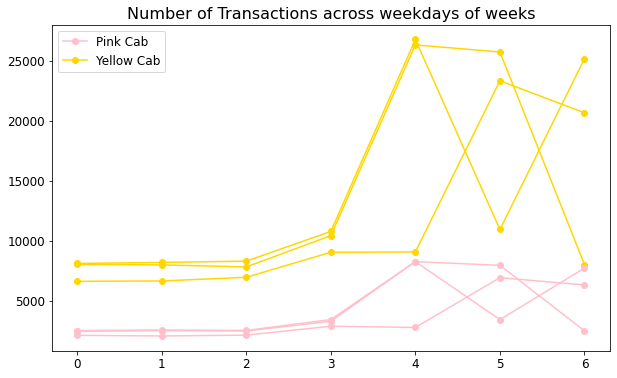

In [123]:
plt.figure(figsize=(10,6))
plt.plot(trans_grp1, marker = 'o', color = 'pink');
plt.plot(trans_grp2, marker = 'o', color = 'gold');
plt.plot(trans_grp3, marker = 'o', color = 'pink');
plt.plot(trans_grp4, marker = 'o', color = 'gold');
plt.plot(trans_grp5, marker = 'o', color = 'pink');
plt.plot(trans_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(0, 7, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Number of Transactions across weekdays of weeks', fontsize=16);

In [124]:
# Number of Customers across weekdays of weeks
cust_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()
cust_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()

In [125]:
cust_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()
cust_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()

In [126]:
cust_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()
cust_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Customer ID'].nunique()

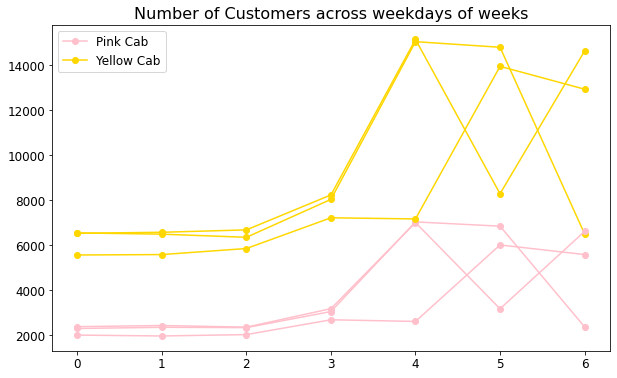

In [127]:
plt.figure(figsize=(10,6))
plt.plot(cust_grp1, marker = 'o', color = 'pink');
plt.plot(cust_grp2, marker = 'o', color = 'gold');
plt.plot(cust_grp3, marker = 'o', color = 'pink');
plt.plot(cust_grp4, marker = 'o', color = 'gold');
plt.plot(cust_grp5, marker = 'o', color = 'pink');
plt.plot(cust_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(0, 7, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Number of Customers across weekdays of weeks', fontsize=16);

In [128]:
# Average Profit per KM of each transaction across weekdays of weeks
profitper_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()
profitper_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()

In [129]:
profitper_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()
profitper_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()

In [130]:
profitper_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()
profitper_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.weekday)['Profit per KM'].mean()

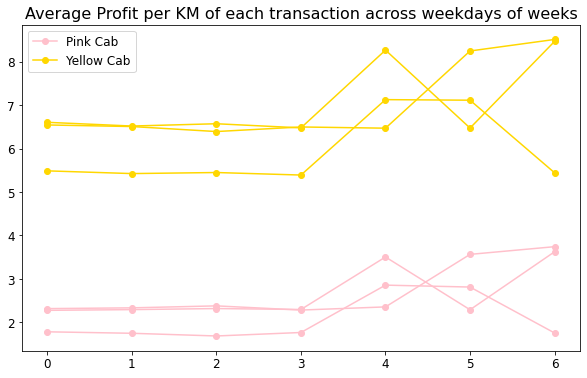

In [131]:
plt.figure(figsize=(10,6))
plt.plot(profitper_grp1, marker = 'o', color = 'pink');
plt.plot(profitper_grp2, marker = 'o', color = 'gold');
plt.plot(profitper_grp3, marker = 'o', color = 'pink');
plt.plot(profitper_grp4, marker = 'o', color = 'gold');
plt.plot(profitper_grp5, marker = 'o', color = 'pink');
plt.plot(profitper_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(0, 7, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);
plt.title('Average Profit per KM of each transaction across weekdays of weeks', fontsize=16);

We can see there are evident tendencies that:
1. Both number of transactions and customers increase from the middle of the years to the ends of years. However, profit per KM decrease along with their increases.
2. Both number of transactions and customers increase from Friday to Sunday (Weekends), and average profit per km of each transaction also increase at Weekends.

#### 3.3.3 Agent-based: User Reach %

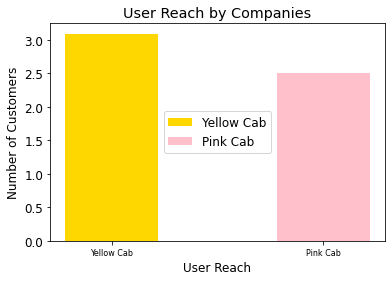

In [132]:
# Users Reach % by Companies
yellow_grp7 = yellow_grp4.groupby(['Company'])['Customer ID'].sum()
yellow_grp7 = pd.DataFrame(yellow_grp7)
yellow_grp7 = yellow_grp7.reset_index()
yellow_grp7['All'] = df_city['Users'].sum()
yellow_grp7['User Reach'] = yellow_grp7['Customer ID']/yellow_grp7['All']*100
pink_grp7 = pink_grp4.groupby(['Company'])['Customer ID'].sum()
pink_grp7 = pd.DataFrame(pink_grp7)
pink_grp7 = pink_grp7.reset_index()
pink_grp7['All'] = df_city['Users'].sum()
pink_grp7['User Reach'] = pink_grp7['Customer ID']/pink_grp7['All']*100

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(yellow_grp7['Company'], yellow_grp7['User Reach'], 0.44, color='gold', label='Yellow Cab')
ax.bar(pink_grp7['Company'], pink_grp7['User Reach'], 0.44, color='pink', label='Pink Cab')

plt.ylabel("Number of Customers")
plt.xlabel("User Reach")
plt.xticks(fontsize=8)
plt.title("User Reach by Companies")
plt.legend(loc='center')

plt.show()

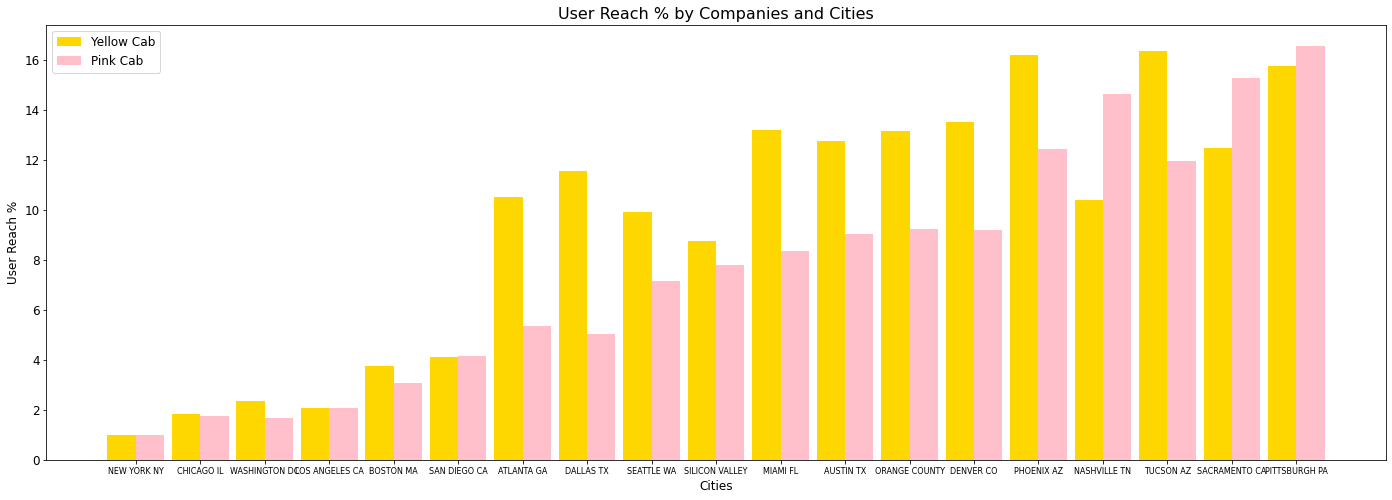

In [133]:
# User Reach % by Companies by Cities
user_reach_yellow = pd.merge(company_city_grp2[company_city_grp2['Company']=='Yellow Cab'], df_city[['City', 'Users']], on='City')
user_reach_yellow['User Reach'] = user_reach_yellow['Customer ID']/user_reach_yellow['Users']*100
user_reach_yellow = user_reach_yellow.sort_values(by=['User Reach'], ascending=False)
user_reach_yellow = user_reach_yellow.set_index('City')
user_reach_yellow = user_reach_yellow.reindex(index=yellow_grp4['City'])
user_reach_yellow = user_reach_yellow.reset_index()

user_reach_pink = pd.merge(company_city_grp2[company_city_grp2['Company']=='Pink Cab'], df_city[['City', 'Users']], on='City')
user_reach_pink['User Reach'] = user_reach_pink['Customer ID']/user_reach_pink['Users']*100
user_reach_pink = user_reach_pink.sort_values(by=['User Reach'], ascending=False)
user_reach_pink = user_reach_pink.set_index('City')
user_reach_pink = user_reach_pink.reindex(index=user_reach_yellow['City'])
user_reach_pink = user_reach_pink.reset_index()

fig, ax = plt.subplots(figsize=(24,8))

X = user_reach_yellow['City'].values.tolist()
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, user_reach_yellow['User Reach'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, user_reach_pink['User Reach'], 0.44, color='pink', label='Pink Cab')

plt.xticks(X_axis, X)
plt.ylabel("User Reach %")
plt.xlabel("Cities")
plt.xticks(fontsize=8)
plt.title("User Reach % by Companies and Cities", fontsize=16)
plt.legend()

plt.show()

#### 3.3.4 Agent-based: Customer Retention

In [134]:
# Customer Retention
df_dedupe2['Retention (5 times)'] = np.where((df_dedupe2['Frequency']<5), 1, 0)
df_dedupe2['Retention (5+ times)'] = np.where((df_dedupe2['Frequency']>=5) & (df_dedupe2['Frequency']<10), 1, 0)
df_dedupe2['Retention (10+ times)'] = np.where((df_dedupe2['Frequency']>=10), 1, 0)
df_dedupe2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM,Frequency,Retention (5 times),Retention (5+ times),Retention (10+ times)
0,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.200,943999,6133,21481,Card,Male,28,18030,597.320,19.910667,1,1,0,0
1,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,545776,7044,47687,Card,Male,25,16088,518.220,13.637368,1,1,0,0
2,10000345,2016-01-02,Pink Cab,SEATTLE WA,20.40,259.48,234.600,671238,25063,37896,Card,Male,39,7143,24.880,1.219608,1,1,0,0
3,10000164,2016-01-02,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,943999,6133,22469,Card,Male,37,4378,24.375,2.850877,1,1,0,0
4,10000163,2016-01-02,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,943999,6133,22557,Cash,Male,38,8808,22.730,5.119369,1,1,0,0


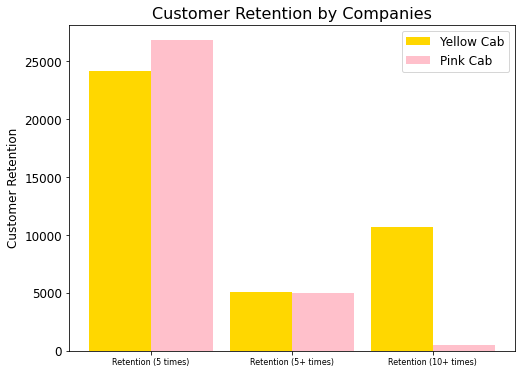

In [135]:
# Customer Retention by Companies
rent_yellow_grp1 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['Company'])['Retention (5 times)'].sum()
rent_yellow_grp2 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['Company'])['Retention (5+ times)'].sum()
rent_yellow_grp3 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['Company'])['Retention (10+ times)'].sum()
rent_pink_grp1 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['Company'])['Retention (5 times)'].sum()
rent_pink_grp2 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['Company'])['Retention (5+ times)'].sum()
rent_pink_grp3 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['Company'])['Retention (10+ times)'].sum()

rent_yellow_grp1 = pd.DataFrame(rent_yellow_grp1).reset_index()
rent_yellow_grp2 = pd.DataFrame(rent_yellow_grp2).reset_index()
rent_yellow_grp3 = pd.DataFrame(rent_yellow_grp3).reset_index()
rent_pink_grp1 = pd.DataFrame(rent_pink_grp1).reset_index()
rent_pink_grp2 = pd.DataFrame(rent_pink_grp2).reset_index()
rent_pink_grp3 = pd.DataFrame(rent_pink_grp3).reset_index()

rent_yellow_grp = pd.concat([rent_yellow_grp1, rent_yellow_grp2, rent_yellow_grp3]).T.reset_index()
rent_yellow_grp = rent_yellow_grp.fillna(0)
rent_yellow_grp['Customers'] = rent_yellow_grp.iloc[:,1:4].sum(axis=1)
rent_yellow_grp = rent_yellow_grp.iloc[1:, :]
rent_yellow_grp = rent_yellow_grp.drop(rent_yellow_grp.columns[[1,2,3]], axis=1)
rent_pink_grp = pd.concat([rent_pink_grp1, rent_pink_grp2, rent_pink_grp3]).T.reset_index()
rent_pink_grp = rent_pink_grp.fillna(0)
rent_pink_grp['Customers'] = rent_pink_grp.iloc[:,1:4].sum(axis=1)
rent_pink_grp = rent_pink_grp.iloc[1:, :]
rent_pink_grp = rent_pink_grp.drop(rent_pink_grp.columns[[1,2,3]], axis=1)

fig, ax = plt.subplots(figsize=(8,6))

#X = user_reach_yellow['City'].values.tolist()
X = ['Retention (5 times)', 'Retention (5+ times)', 'Retention (10+ times)']
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, rent_yellow_grp['Customers'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, rent_pink_grp['Customers'], 0.44, color='pink', label='Pink Cab')

plt.xticks(X_axis, X)
plt.ylabel("Customer Retention")
plt.xlabel(" ")
plt.xticks(fontsize=8)
plt.title("Customer Retention by Companies", fontsize=16)
plt.legend()

plt.show()

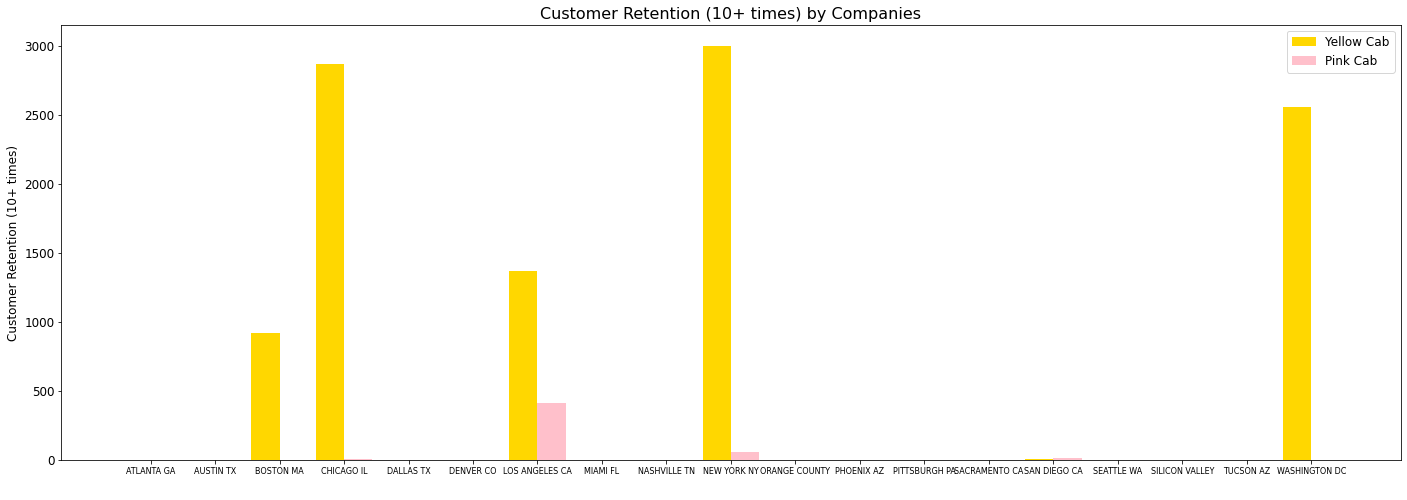

In [136]:
# Customer Retention by Companies by Cities
#rent_yellow_grp4 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['City'])['Retention (5 times)'].sum()
#rent_yellow_grp5 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['City'])['Retention (5+ times)'].sum()
rent_yellow_grp6 = df_dedupe2[df_dedupe2['Company']=='Yellow Cab'].groupby(['City'])['Retention (10+ times)'].sum()
#rent_pink_grp4 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['City'])['Retention (5 times)'].sum()
#rent_pink_grp5 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['City'])['Retention (5+ times)'].sum()
rent_pink_grp6 = df_dedupe2[df_dedupe2['Company']=='Pink Cab'].groupby(['City'])['Retention (10+ times)'].sum()
rent_yellow_grp6 = pd.DataFrame(rent_yellow_grp6).reset_index()
rent_pink_grp6 = pd.DataFrame(rent_pink_grp6).reset_index()

fig, ax = plt.subplots(figsize=(24,8))

X = rent_yellow_grp6['City'].values.tolist()
#X = ['Retention (5 times)', 'Retention (5+ times)', 'Retention (10+ times)']
X_axis = np.arange(len(X))
ax.bar(X_axis-0.22, rent_yellow_grp6['Retention (10+ times)'], 0.44, color='gold', label='Yellow Cab')
ax.bar(X_axis+0.22, rent_pink_grp6['Retention (10+ times)'], 0.44, color='pink', label='Pink Cab')

plt.xticks(X_axis, X)
plt.ylabel("Customer Retention (10+ times)")
plt.xlabel(" ")
plt.xticks(fontsize=8)
plt.title("Customer Retention (10+ times) by Companies", fontsize=16)
plt.legend()

plt.show()

We can see there are evident tendencies that:
1. As for the user reach percentage, Yellow Cab has higher reach percentage than Pink Cab totally, but with similar low user reach percentages in large cities and relatively higher user reach percentages at about 10% in smaller cities.
2. As for the customer retention percentage, Yellow Cab has better customer retention situations than Pink Cab totally, with more royal customers making more than 10 times transactions and especially in large cities.

## 4. Conclusions & Recommendations

First, from the descriptive analysis, here are several findings:
1. Yellow Cab had both more transactions and more customers than Pink Cab.
2. Yellow Cab made more businesses in bigger cities with higher frequency of taking cabs than Pink Cab.
3. Yellow Cab had more male customer with higher frequency of taking Cabs.
4. Yellow Cab had higher profit and profit per KM in total especially in bigger cities except Chicago.

Then, from the correlation analysis, we can observe from Chi-Square test, the correlation heatmap and t-test ANOVA that there are significant correlation between following variables on the confidence level of 95%:
1. Company - City: highly related categories
2. KM Travelled - Cost of Trip - Price Charged - Profit - Profit per KM: highly related.
3. Company/City/Gender - Profit/Profit per KM/Frequency (based on both transactions and customer)

From the contextual analysis, we can see that:
1. Both number of transactions and customers increase from the middle of the years to the ends of years. However, profit per KM decrease along with their increases.
2. Both number of transactions and customers increase from Friday to Sunday (Weekends), and average profit per km of each transaction also increase at Weekends.
3. As for the user reach percentage, Yellow Cab has higher reach percentage than Pink Cab totally, but with similar low user reach percentages in large cities and relatively higher user reach percentages at about 10% in smaller cities.
4. As for the customer retention percentage, Yellow Cab has better customer retention situations than Pink Cab totally, with more royal customers making more than 10 times transactions and especially in large cities.

Therefore, it is evident and we can recommend that Yellow Cab performs better to be invested.




## 5. Hypothesis & Model

Investment does not only depend on the historical perfermances of companies, also depends on the future performances. Therefore, we decided the Profit per KM as the target variable to build the time series forecasting machine learning model on and predict. According to the above explortory data analysis, we can generate a hypothesis that.

In [137]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844,1.929439


In [138]:
df_time = df.copy()
df_time = df_time[['Date of Travel', 'Company', 'Profit per KM']]
df_time.head()

,Date of Travel,Company,Profit per KM
0,2016-01-08,Pink Cab,1.882266
1,2016-01-06,Pink Cab,0.826904
2,2016-01-02,Pink Cab,3.049558
3,2016-01-07,Pink Cab,0.777751
4,2016-01-03,Pink Cab,1.929439


In [139]:
df_time_yellow = df_time[df_time['Company']=='Yellow Cab']
df_time_yellow = df_time_yellow.groupby(df_time_yellow['Date of Travel'].dt.date)['Profit per KM'].mean()
df_time_pink= df_time[df_time['Company']=='Pink Cab']
df_time_pink = df_time_pink.groupby(df_time_pink['Date of Travel'].dt.date)['Profit per KM'].mean()

In [140]:
df_time_yellow.head()

Date of Travel
2016-01-02    13.607759
2016-01-03    13.497271
2016-01-04     9.102665
2016-01-05    10.667592
2016-01-06     9.681309
Name: Profit per KM, dtype: float64

In [141]:
df_time_yellow.dtypes

dtype('float64')

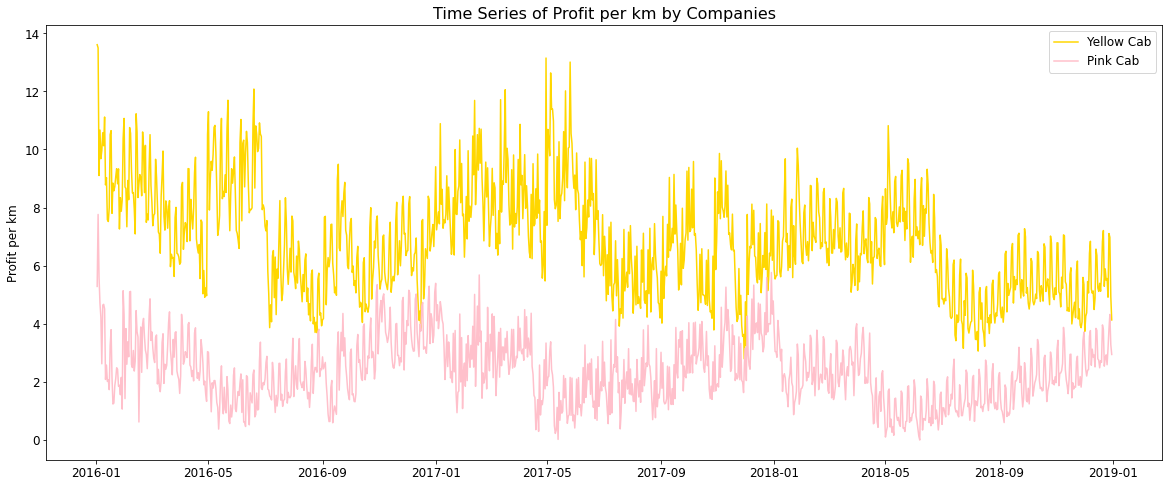

In [142]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df_time_yellow, color='gold', label='Yellow Cab')
ax.plot(df_time_pink, color='pink', label='Pink Cab')

plt.ylabel("Profit per km")
plt.xlabel(" ")
plt.title("Time Series of Profit per km by Companies", fontsize=16)
plt.legend()

plt.show()

In [143]:
# Get the lag days
df_time_yellow = pd.DataFrame(df_time_yellow).reset_index()
df_time_pink = pd.DataFrame(df_time_pink).reset_index()

df_time_yellow['PPK_LastDay'] = df_time_yellow['Profit per KM'].shift(+1)
df_time_yellow['PPK_2DaysBack'] = df_time_yellow['Profit per KM'].shift(+2)
df_time_yellow['PPK_3DaysBack'] = df_time_yellow['Profit per KM'].shift(+3)

df_time_pink['PPK_LastDay'] = df_time_pink['Profit per KM'].shift(+1)
df_time_pink['PPK_2DaysBack'] = df_time_pink['Profit per KM'].shift(+2)
df_time_pink['PPK_3DaysBack'] = df_time_pink['Profit per KM'].shift(+3)

df_time_yellow = df_time_yellow.dropna()
df_time_pink = df_time_pink.dropna()
df_time_yellow.head()

,Date of Travel,Profit per KM,PPK_LastDay,PPK_2DaysBack,PPK_3DaysBack
3,2016-01-05,10.667592,9.102665,13.497271,13.607759
4,2016-01-06,9.681309,10.667592,9.102665,13.497271
5,2016-01-07,9.965582,9.681309,10.667592,9.102665
6,2016-01-08,10.575933,9.965582,9.681309,10.667592
7,2016-01-09,10.128360,10.575933,9.965582,9.681309


### 5.1 Machine Learning Time Series Forecasting Models

In [144]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [145]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [146]:
# Yellow Cab Prediction
# Prepare the data for model fitting
x1,x2,x3,y = df_time_yellow['PPK_LastDay'],df_time_yellow['PPK_2DaysBack'],df_time_yellow['PPK_3DaysBack'],df_time_yellow['Profit per KM']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 9.10266452 13.4972708  13.60775943]
 [10.66759172  9.10266452 13.4972708 ]
 [ 9.6813092  10.66759172  9.10266452]
 ...
 [ 7.10483455  4.9130801   5.55688798]
 [ 6.97740797  7.10483455  4.9130801 ]
 [ 4.93625912  6.97740797  7.10483455]]


In [147]:
X_train, X_test, y_train, y_test = final_x[:-300], final_x[-300:], y[:-300], y[-300:]

In [148]:
# Fit the models
lin_model.fit(X_train,y_train)
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

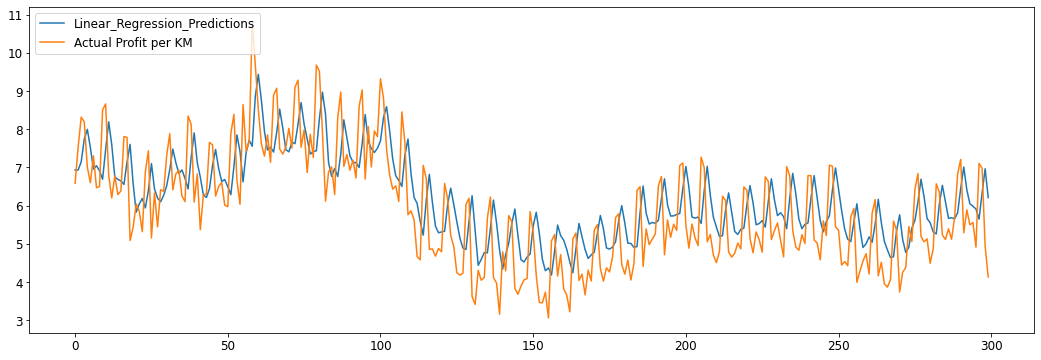

In [149]:
# Linear Regression Prediction
lin_pred = lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test, label='Actual Profit per KM')
plt.legend(loc="upper left")
plt.show()

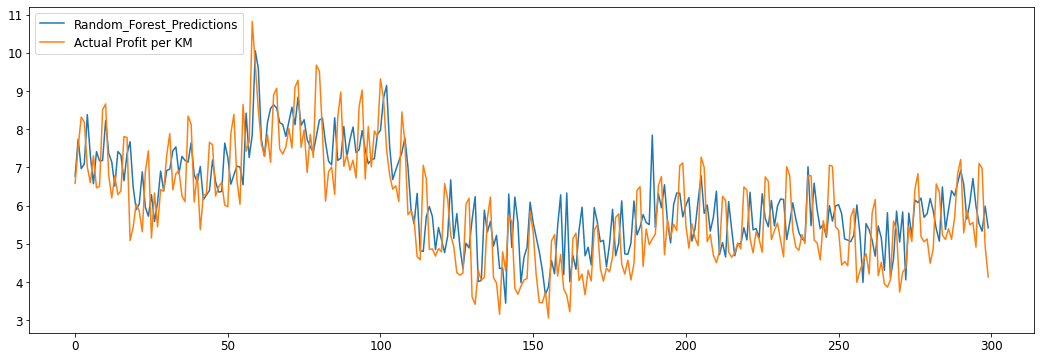

In [150]:
# Random Forest Prediction
pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test, label='Actual Profit per KM')
plt.legend(loc="upper left")
plt.show()

In [151]:
# Compare the accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lr = sqrt(mean_squared_error(lin_pred,y_test))
rmse_rf = sqrt(mean_squared_error(pred,y_test))

print('Mean Squared Error for Linear Regression Model is:',rmse_lr)
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Linear Regression Model is: 1.0695442986779296
Mean Squared Error for Random Forest Model is: 1.02900010001612


In [152]:
# Pink Cab Prediction
# Prepare the data for model fitting
x1,x2,x3,y = df_time_pink['PPK_LastDay'],df_time_pink['PPK_2DaysBack'],df_time_pink['PPK_3DaysBack'],df_time_pink['Profit per KM']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[5.61216423 7.76253002 5.28430203]
 [4.7107032  5.61216423 7.76253002]
 [4.21807232 4.7107032  5.61216423]
 ...
 [3.80673958 3.13683429 2.58751412]
 [4.31825385 3.80673958 3.13683429]
 [3.28079318 4.31825385 3.80673958]]


In [153]:
X_train, X_test, y_train, y_test = final_x[:-300], final_x[-300:], y[:-300], y[-300:]

In [154]:
# Fit the models
lin_model.fit(X_train,y_train)
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

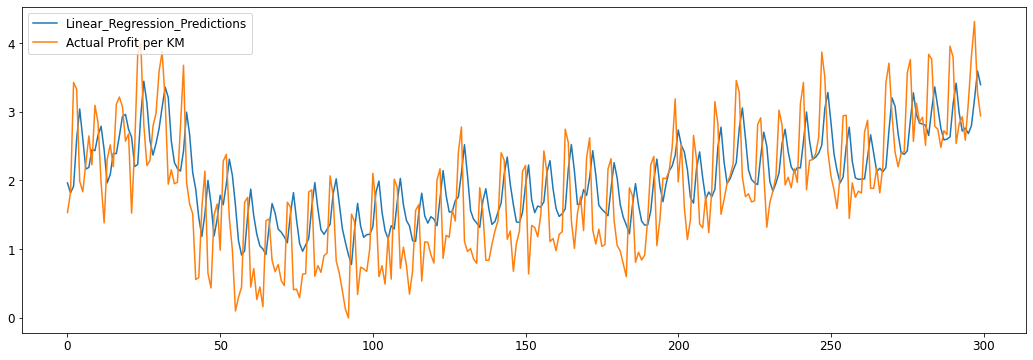

In [155]:
# Linear Regression Prediction
lin_pred = lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test, label='Actual Profit per KM')
plt.legend(loc="upper left")
plt.show()

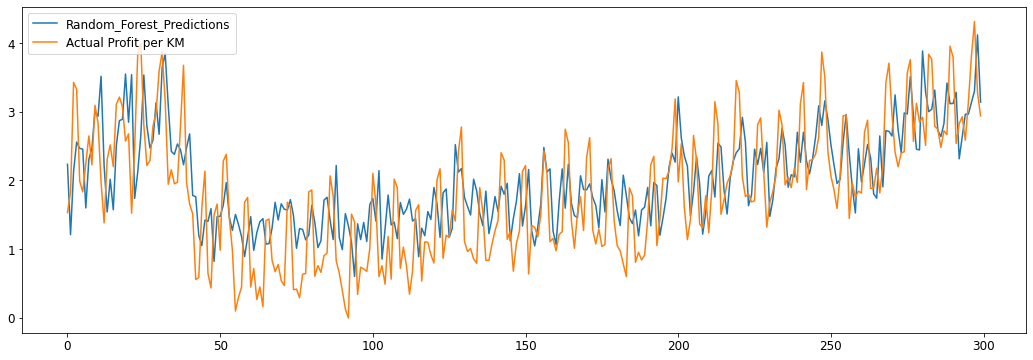

In [156]:
# Random Forest Prediction
pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test, label='Actual Profit per KM')
plt.legend(loc="upper left")
plt.show()

In [157]:
# Compare the accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lr = sqrt(mean_squared_error(lin_pred,y_test))
rmse_rf = sqrt(mean_squared_error(pred,y_test))

print('Mean Squared Error for Linear Regression Model is:',rmse_lr)
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Linear Regression Model is: 0.7162353030101485
Mean Squared Error for Random Forest Model is: 0.6870965190611749


### 5.2 AR model

In [158]:
# Yellow Cab Prediction
# Prepare the data for model fitting
y = df_time_yellow['Profit per KM']
y = np.array(y)
y = y.reshape(-1,1)
print(y)

[[10.66759172]
 [ 9.6813092 ]
 [ 9.96558226]
 ...
 [ 6.97740797]
 [ 4.93625912]
 [ 4.12983617]]


In [159]:
# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model_yellow = AutoReg(y, lags=365)
model_yellow_fit = model_yellow.fit()

# make prediction
yhat_yellow = model_yellow_fit.predict(len(y), len(y)+365)
print(yhat_yellow)

[5.1407702  4.68800469 3.9542026  5.85239479 6.00949447 4.74995219
 4.54321806 4.52137734 5.10578043 5.4511817  6.6709801  6.88178552
 5.87946641 5.53990315 5.37072187 6.174706   6.13330195 6.8227302
 7.83793934 5.93086119 6.05640545 6.00355666 6.59229178 6.22843758
 7.88888064 7.8830534  6.82217544 6.43083218 6.27024093 6.33066293
 6.41158397 6.96107774 7.61003401 6.2761866  5.49616048 4.82020122
 5.95750572 5.70297999 6.43809906 7.10896313 5.37601157 5.58693338
 5.20731144 5.52253207 5.738602   6.75249946 6.74681081 5.77017437
 5.22616526 5.46621164 4.92679272 5.39805772 6.21088471 6.52945356
 5.43562977 4.88927515 4.89584264 5.3180811  5.68854356 5.99176857
 6.37074292 5.17823662 4.71510824 4.85891314 5.15860623 5.53368838
 6.05702707 6.12136529 4.89752321 4.19375413 4.62773369 5.3659983
 5.41943412 6.00821854 6.58713241 5.3660356  4.47321958 4.39392415
 4.77007749 5.04487038 5.20365263 5.88861219 4.55365041 3.75894126
 3.67790318 4.60573436 4.69724383 5.22396232 5.26412053 4.574386

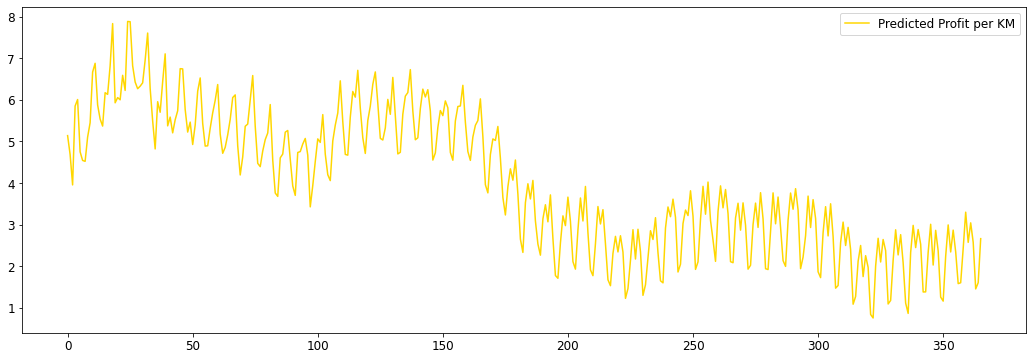

In [160]:
yhat_yellow = pd.DataFrame(yhat_yellow)
yhat_yellow = yhat_yellow.rename(columns={0:'Predicted Profit per KM'})
yhat_yellow.plot(color='Gold')

In [161]:
# Pink Cab Prediction
# Prepare the data for model fitting
y = df_time_pink['Profit per KM']
y = np.array(y)
y = y.reshape(-1,1)
print(y)

[[4.7107032 ]
 [4.21807232]
 [2.61961469]
 ...
 [4.31825385]
 [3.28079318]
 [2.94133034]]


In [162]:
# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model_pink = AutoReg(y, lags=365)
model_pink_fit = model_pink.fit()

# make prediction
yhat_pink = model_pink_fit.predict(len(y), len(y)+365)
print(yhat_pink)

[ 2.74296248  2.58116703  2.52264639  3.27579722  3.91626915  2.55265796
  1.90087674  1.72936928  1.7824027   1.82691769  1.98469265  2.72848201
  1.09780015  1.2286576   1.27980109  1.89522753  1.75730754  2.11614262
  2.9116763   1.60837448  1.15155532  1.00864918  1.54918044  1.68818195
  2.11676421  2.46475052  1.3972078   0.98785642  1.20512523  1.57976949
  1.22321329  1.56826785  1.9505878   1.58174266  1.37665156  1.35529669
  1.57145584  1.75466089  2.31688991  2.50603317  1.52509977  0.68276711
  0.92963661  1.57171321  1.71799105  1.98192149  2.32622682  1.74114295
  1.03007774  1.53690616  1.71405226  1.95881392  1.79427159  2.32330862
  1.3772037   0.79758237  0.75619144  1.35588345  1.54237074  1.31463394
  1.71617122  1.13516817  0.77903333  0.64969208  1.51337271  1.77854826
  1.80469091  2.23085273  1.76926633  0.9836714   0.75501137  1.44926347
  1.67586782  1.94287669  2.01372315  1.42418213  0.75966289  0.77105421
  1.63858669  1.88737621  1.96579216  2.18711428  1

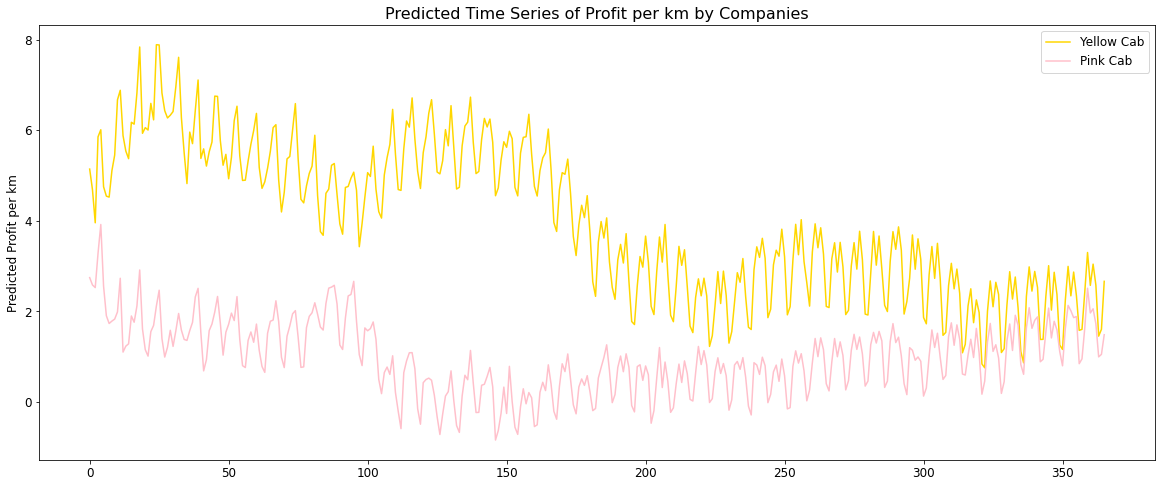

In [164]:
yhat_pink = pd.DataFrame(yhat_pink)
yhat_pink = yhat_pink.rename(columns={0:'Predicted Profit per KM'})

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(yhat_yellow, color='gold', label='Yellow Cab')
ax.plot(yhat_pink, color='pink', label='Pink Cab')

plt.ylabel("Predicted Profit per km")
plt.xlabel(" ")
plt.title("Predicted Time Series of Profit per km by Companies", fontsize=16)
plt.legend()

plt.show()

Therefore, we predicted the trends of Profit per KM by companies in the following year days to see that: Yellow Cab can still perform better than Pink Cab totally but can have similar worse performance with Pink Cab at the end of the year. We can consider about mainly investing in Yellow Cab first while moderately investing in Pink Cab in the later half of the next year.